# 探索的データ分析(EDA)

## 1. データの概要を把握する分析
- データの分布を確認
    - 欠損値
    - 外れ値
    - 偏り
    - カテゴリ数
- 目的変数との相関を確認

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import create_population
import create_population3
import preprocessing
from feature_engineering import FeatureCreator
from feature_engineering_prediction import PredictionFeatureCreator

import prediction

import pandas as pd
%load_ext autoreload


In [3]:
%autoreload

UsageError: Line magic function `%autoreload` not found.


In [25]:
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
population = create_population.create(from_="2016-01-01", to_="2023-12-31")


In [26]:

# レース結果テーブルの前処理
results_preprocessed = preprocessing.process_results()
# 馬の過去成績テーブルの加工
horse_results_preprocessed = preprocessing.process_horse_results()
# レース情報テーブルの前処理
race_info_preprocessed = preprocessing.process_race_info()
# 騎手リーディングテーブルの前処理
jockey_leading_preprocessed = preprocessing.process_jockey_leading()
# 調教師リーディングテーブルの前処理
trainer_leading_preprocessed = preprocessing.process_trainer_leading()
# 血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds()
# 種牡馬リーディングテーブルの前処理
sire_leading_preprocessed = preprocessing.process_sire_leading()
fc = FeatureCreator()
features = fc.create_features()
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

agg_horse_n_races_relative:   0%|          | 0/5 [00:00<?, ?it/s]

running agg_jockey()...
running agg_jockey()...comp
running agg_trainer()...
running agg_trainer()...comp


agg_horse_per_course_len:   0%|          | 0/5 [00:00<?, ?it/s]

running cross_features()...comp
running agg_interval()...comp
running cross_features_2()...comp


agg_cross_encoded:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_3()...comp


agg_horse_per_ground_state_race_type:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_class:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_type:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_place_len:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_weather:   0%|          | 0/5 [00:00<?, ?it/s]

running agg_sire()...
running agg_sire()...comp
merging all features...
merging all features...comp


np.int64(0)

In [3]:
df = pd.read_csv("../data/02_features/features.csv", sep="\t")

In [4]:
df.head()

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,time,nobori,umaban,...,win_mean_10races_per_weather_relative,win_max_10races_per_weather_relative,win_min_10races_per_weather_relative,show_mean_10races_per_weather_relative,show_max_10races_per_weather_relative,show_min_10races_per_weather_relative,sire_n_races_relative,sire_n_wins_relative,sire_winrate_relative,sire_course_len_diff_relative
0,202206010101,2022-01-05,2019103610,1192,1020,897009,1,72.5,37.6,15,...,NaN,NaN,NaN,1.283881,2.253203,-0.27735,NaN,NaN,NaN,NaN
1,202206010101,2022-01-05,2019100855,1179,1088,125008,2,72.5,37.7,10,...,NaN,NaN,NaN,-0.385164,-0.409673,-0.27735,NaN,NaN,NaN,NaN
2,202206010101,2022-01-05,2019103542,1009,1089,546800,3,72.5,37.3,4,...,NaN,NaN,NaN,-0.385164,-0.409673,-0.27735,NaN,NaN,NaN,NaN
3,202206010101,2022-01-05,2019104288,1119,1132,64803,4,72.8,37.2,2,...,NaN,NaN,NaN,-0.385164,-0.409673,-0.27735,NaN,NaN,NaN,NaN
4,202206010101,2022-01-05,2019101003,5212,1109,427030,5,73.2,38.0,16,...,NaN,NaN,NaN,-0.385164,-0.409673,-0.27735,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,time,nobori,umaban,...,win_mean_10races_per_weather_relative,win_max_10races_per_weather_relative,win_min_10races_per_weather_relative,show_mean_10races_per_weather_relative,show_max_10races_per_weather_relative,show_min_10races_per_weather_relative,sire_n_races_relative,sire_n_wins_relative,sire_winrate_relative,sire_course_len_diff_relative
94108,202309050912,2023-12-28,2017104873,1154,425,758005,12,69.5,33.6,11,...,-1.437777,-2.561738,NaN,-0.991184,NaN,NaN,NaN,NaN,NaN,NaN
94109,202309050912,2023-12-28,2019100653,1138,1158,950006,13,69.5,34.2,15,...,-0.444167,0.365963,NaN,-1.380550,NaN,NaN,NaN,NaN,NaN,NaN
94110,202309050912,2023-12-28,2017106240,1018,1178,258033,14,69.6,34.5,7,...,-0.642889,0.365963,NaN,-0.472029,NaN,NaN,NaN,NaN,NaN,NaN
94111,202309050912,2023-12-28,2018103205,1112,428,629800,15,69.8,34.9,16,...,-0.642889,0.365963,NaN,-0.991184,NaN,NaN,NaN,NaN,NaN,NaN
94112,202309050912,2023-12-28,2017102603,1144,1050,356002,16,70.4,34.4,14,...,0.151999,0.365963,NaN,-0.991184,NaN,NaN,NaN,NaN,NaN,NaN


### データの分布を確認する

In [7]:
# 目的変数
df["target"] = (df["rank"] == 1).astype(int)

In [8]:
df["target"].value_counts()

target
0    87194
1     6919
Name: count, dtype: int64

In [9]:
df["target"].mean()

np.float64(0.07351800495149448)

In [10]:
#説明変数

In [12]:
# 年間レース数・出馬数など
df["year"] = pd.to_datetime(df["date"]).dt.year
df["year"].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: year, dtype: int32

In [13]:
#年間ごとのレース数、馬の数、ジョッキー、トレーナーなど
df.groupby("year")[["race_id", "horse_id", "jockey_id", "trainer_id"]].nunique()

,race_id,horse_id,jockey_id,trainer_id
year,,,,
2022,3456,11497,196,230
2023,3456,11664,198,234


In [19]:
df["race_id"].value_counts()

race_id
201805020404    18
202004020105    18
202010011111    18
201807030307    18
202010011103    18
                ..
202008010606     5
202009050409     5
202302020205     5
202207010608     4
201907030504     4
Name: count, Length: 20729, dtype: int64

In [14]:
#何頭だてのレースがどれくらいあるか
df["race_id"].value_counts().value_counts()

count
16    6116
15    2657
14    2101
13    1691
12    1686
11    1505
10    1239
18    1238
9      956
8      688
17     431
7      281
6       99
5       39
4        2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='count'>

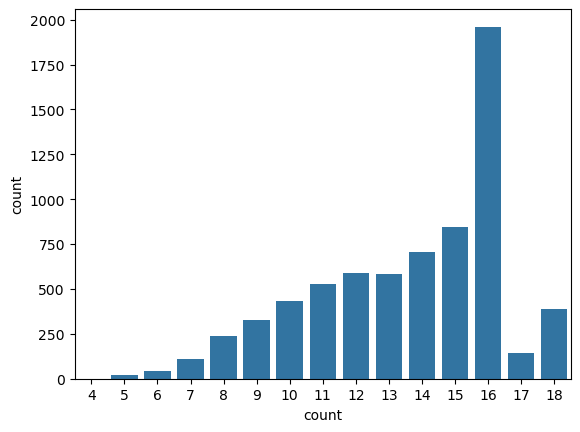

In [14]:
sns.barplot(df["race_id"].value_counts().value_counts())

In [15]:
sns.set
#綺麗に整えてくれる

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='count', ylabel='count'>

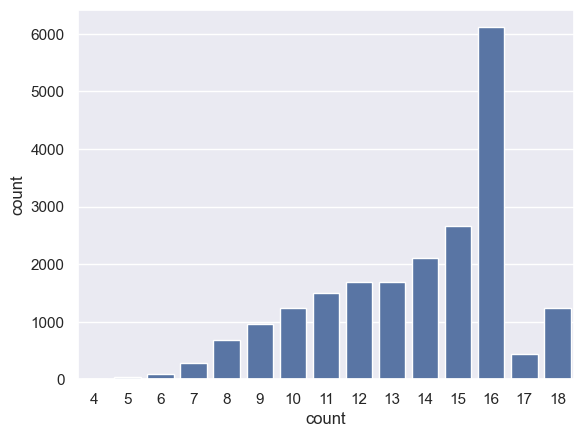

In [17]:
sns.barplot(df["race_id"].value_counts().value_counts())

In [26]:
agg_df = df["race_id"].value_counts().to_frame().reset_index()
agg_df

,race_id,count
0,201805020404,18
1,202004020105,18
2,202010011111,18
3,201807030307,18
4,202010011103,18
...,...,...
20724,202008010606,5
20725,202009050409,5
20726,202302020205,5
20727,202207010608,4


<Axes: xlabel='count', ylabel='count'>

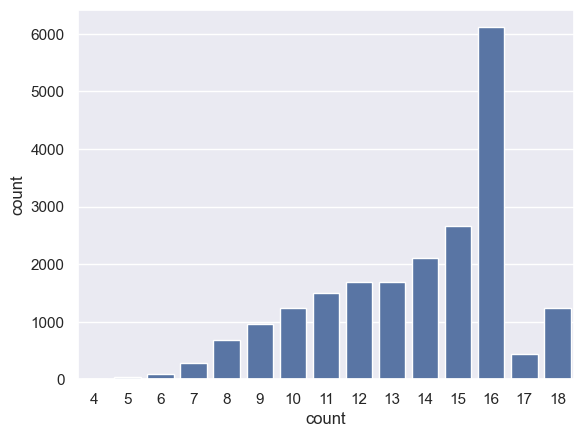

In [27]:
sns.countplot(data=agg_df, x="count")

In [ ]:
# 基本の型＿テンプレ＿
sns.hogehogeplot(data=df, x="列名", y="列名")

In [28]:
df.head()

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,umaban,wakuban,tansho_odds,...,win_min_20races_per_race_type_relative,show_mean_20races_per_race_type_relative,show_max_20races_per_race_type_relative,show_min_20races_per_race_type_relative,sire_n_races_relative,sire_n_wins_relative,sire_winrate_relative,sire_course_len_diff_relative,target,year
0,201806010101,2018-01-06,2015104603,5386,1109,928030,1,15,8,2.0,...,NaN,1.189258,1.132843,-0.288675,-0.118795,-0.340453,-0.285466,0.470337,1,2018
1,201806010101,2018-01-06,2015106010,1085,421,775002,2,3,2,6.7,...,NaN,0.997883,1.132843,-0.288675,-0.662675,-0.961026,-1.319551,0.377336,0,2018
2,201806010101,2018-01-06,2015105549,1075,417,629800,3,6,3,7.6,...,NaN,0.505776,1.132843,-0.288675,-0.267646,-0.478358,-0.394098,-0.469773,0,2018
3,201806010101,2018-01-06,2015103961,1122,1118,669033,4,9,5,48.5,...,NaN,-0.724490,-0.809174,-0.288675,-0.336347,-0.202548,0.307962,-0.154100,0,2018
4,201806010101,2018-01-06,2015103269,1077,1116,866800,5,10,5,61.9,...,NaN,-0.724490,-0.809174,-0.288675,0.024331,-0.409406,-0.534589,-0.345948,0,2018


<Axes: xlabel='id_count', ylabel='count'>

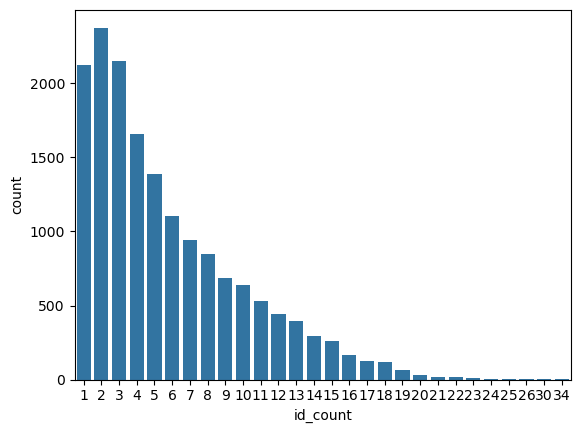

In [17]:
#同じ馬が何回走っているのか
agg_df = df["horse_id"].value_counts().to_frame().reset_index()
agg_df.rename(columns={"count": "id_count"}, inplace=True)
sns.countplot(data=agg_df, x="id_count")

<Axes: xlabel='id_count', ylabel='count'>

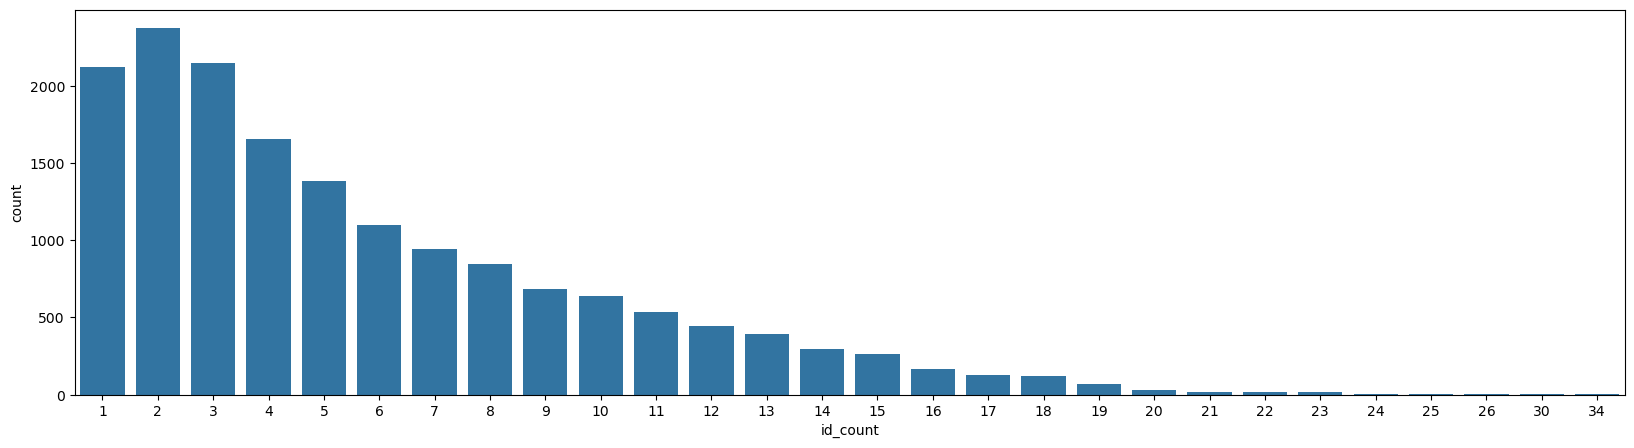

In [18]:
plt.figure(figsize=(20, 5))
sns.countplot(data=agg_df, x="id_count")

<Axes: xlabel='count', ylabel='id_count'>

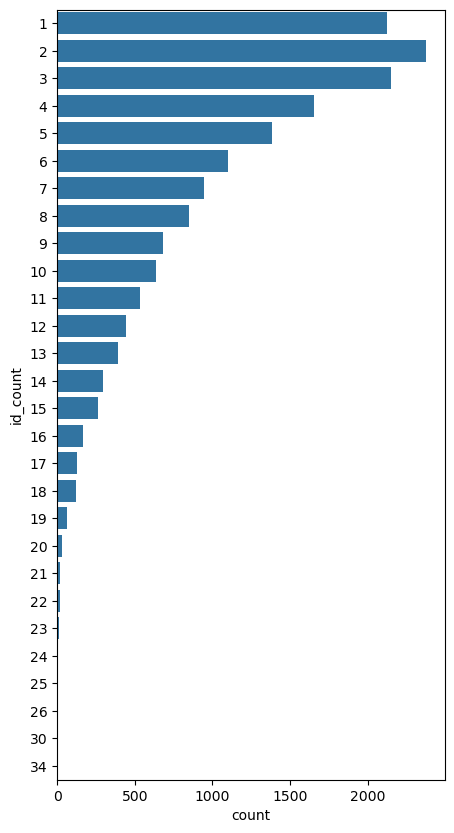

In [19]:
plt.figure(figsize=(5, 10))
sns.countplot(data=agg_df, y="id_count")

In [22]:
#機種がどんくらい出るのか
agg_df = df["jockey_id"].value_counts().rename("id_count").to_frame().reset_index()
agg_df

,jockey_id,id_count
0,1157,1757
1,1018,1746
2,1126,1677
3,732,1677
4,1091,1663
...,...,...
223,5624,1
224,5488,1
225,5229,1
226,5329,1


<Axes: xlabel='id_count', ylabel='count'>

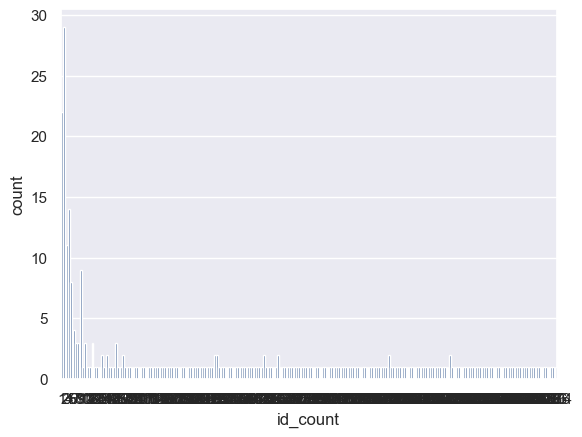

In [21]:
sns.countplot(data=agg_df, x="id_count")

In [22]:
agg_df

,jockey_id,id_count
0,1126,5274
1,1018,5166
2,732,5066
3,1170,4430
4,1157,4388
...,...,...
315,409,1
316,5456,1
317,5598,1
318,5444,1


<Axes: xlabel='id_count'>

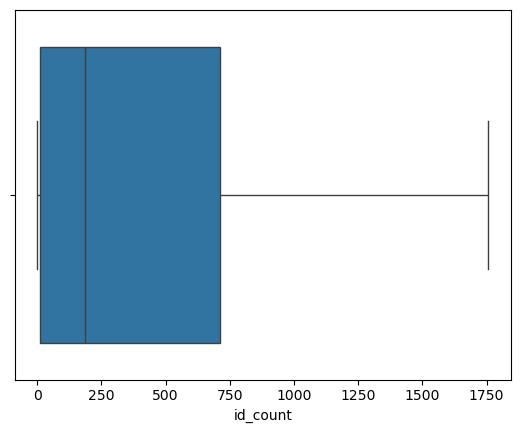

In [23]:
# 箱ひげ図
sns.boxplot(data=agg_df, x="id_count")

75パーセンタイル値 + 1.5 * IQR（箱の長さ）

In [25]:
#id_countの統計量
agg_df["id_count"].describe()

count     228.000000
mean      412.776316
std       476.241728
min         1.000000
25%        10.750000
50%       187.000000
75%       713.750000
max      1757.000000
Name: id_count, dtype: float64

<Axes: xlabel='tansho_odds', ylabel='Count'>

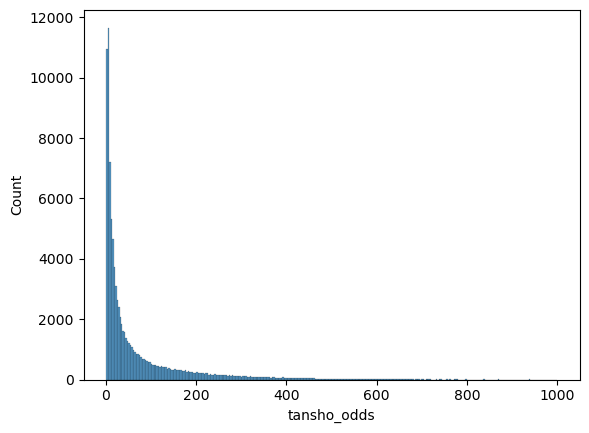

In [26]:
# ヒストグラム: データをいくつかの範囲（ビン）に分けて、その範囲内のデータの個数を棒グラフの形で表したもの
#単勝オッズの範囲
sns.histplot(data=df, x="tansho_odds")

<Axes: xlabel='tansho_odds', ylabel='Count'>

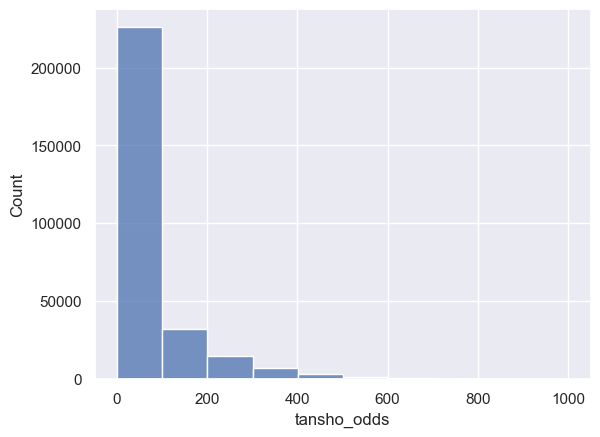

In [21]:
sns.histplot(data=df, x="tansho_odds", bins=10)

<Axes: xlabel='tansho_odds', ylabel='Count'>

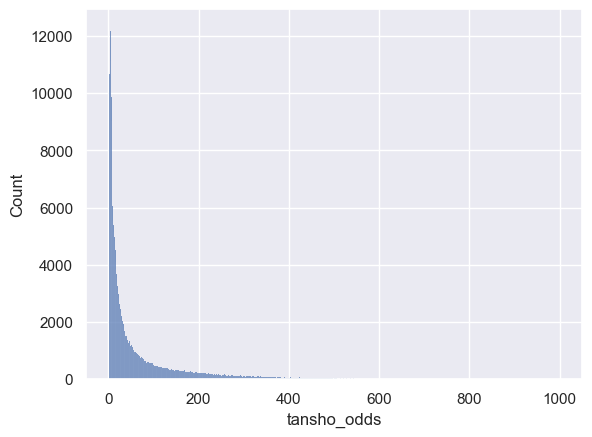

In [31]:
sns.histplot(data=df, x="tansho_odds", bins=1000)

（発展）：デフォルトではFreedman-Diaconis ruleと呼ばれる手法でビンの数が決められている

https://github.com/mwaskom/seaborn/blob/b4e5f8d261d6d5524a00b7dd35e00a40e4855872/seaborn/distributions.py#L2375

In [35]:
# 目的変数との相関＿枠番ごとの勝率＿
df["wakuban"]

0         8
1         2
2         3
3         5
4         5
         ..
284763    6
284764    8
284765    4
284766    8
284767    7
Name: wakuban, Length: 284768, dtype: int64

In [37]:
df["target"]

0         1
1         0
2         0
3         0
4         0
         ..
284763    0
284764    0
284765    0
284766    0
284767    0
Name: target, Length: 284768, dtype: int64

### 目的変数との相関を確認する

<Axes: xlabel='wakuban', ylabel='target'>

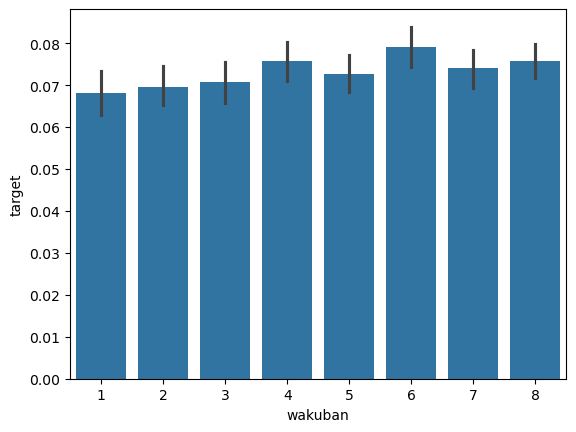

In [27]:
# 目的変数との相関＿枠番ごとの勝率＿
#　棒は95%の信頼区間
sns.barplot(df, x="wakuban", y="target")

{
    "ダ": 0,
    "芝": 1,
    "障": 2
}

In [40]:
df["race_type"].value_counts(dropna=False)
# dropna=Falseで欠損値を含める

race_type
0    142155
1    134040
2      8573
Name: count, dtype: int64

<Axes: xlabel='wakuban', ylabel='target'>

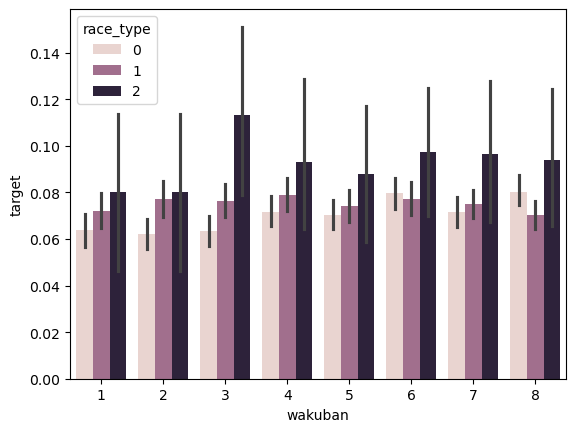

In [28]:
# 目的変数との相関＿枠番ごとの勝率＿レースタイプごと
#レースデータが少ないと標準誤差が大きい
sns.barplot(df, x="wakuban", y="target", hue="race_type")

<Axes: xlabel='race_type', ylabel='target'>

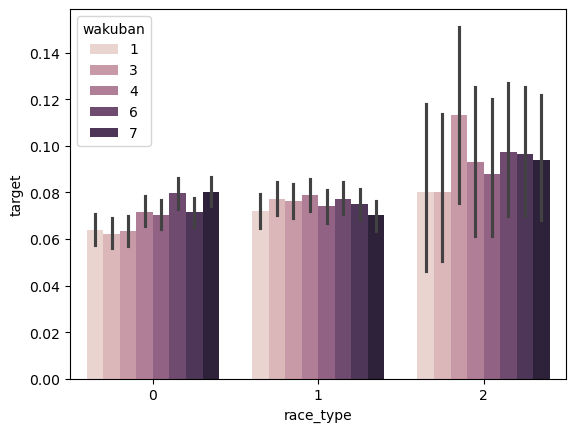

In [29]:
sns.barplot(df, hue="wakuban", y="target", x="race_type")

ダートは外枠有利、芝は内枠有利（だが、そこまで有意な差ではない）

In [43]:
# 馬体重
df["weight"]

0         462
1         478
2         442
3         464
4         456
         ... 
284763    512
284764    498
284765    508
284766    472
284767    490
Name: weight, Length: 284768, dtype: int64

<Axes: xlabel='weight', ylabel='Count'>

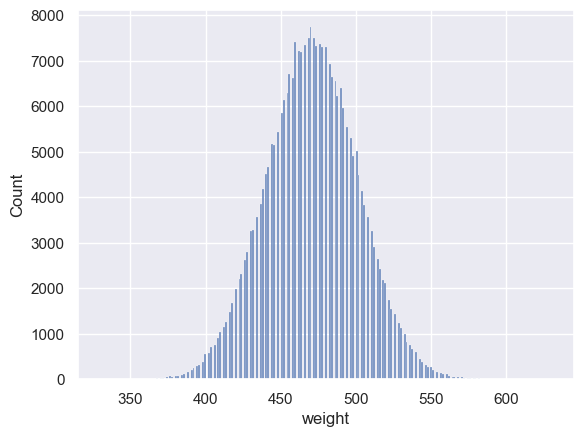

In [26]:
#離散的なデータをプロットしてくれる
sns.histplot(df, x="weight")

<Axes: xlabel='weight', ylabel='Count'>

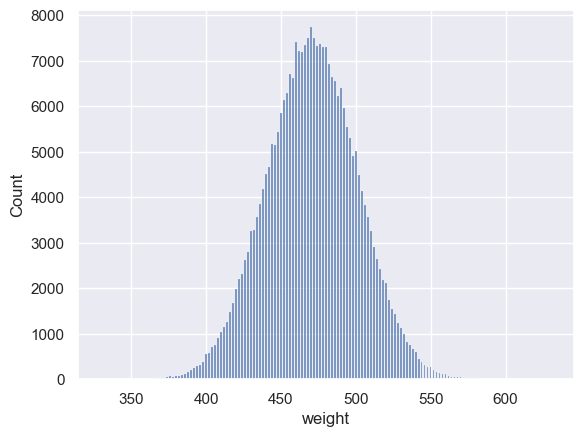

In [45]:
sns.histplot(df, x="weight", discrete=True)

<Axes: xlabel='target', ylabel='weight'>

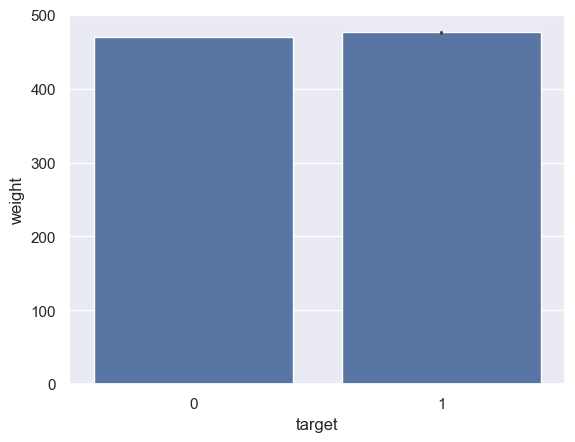

In [27]:
sns.barplot(df, x="target", y="weight")

<Axes: xlabel='target', ylabel='weight'>

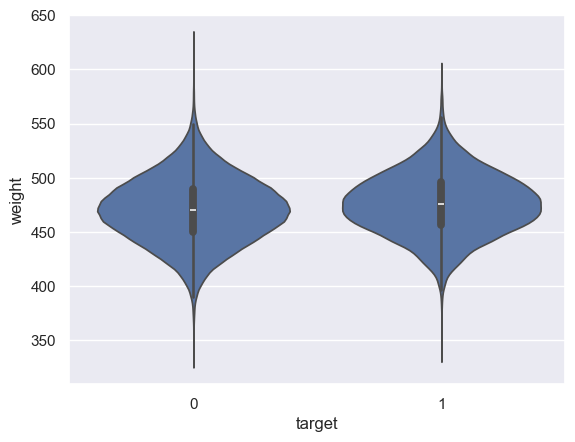

In [46]:
#＿目的変数との相関
sns.violinplot(df, x="target", y="weight")

<Axes: xlabel='weight', ylabel='Count'>

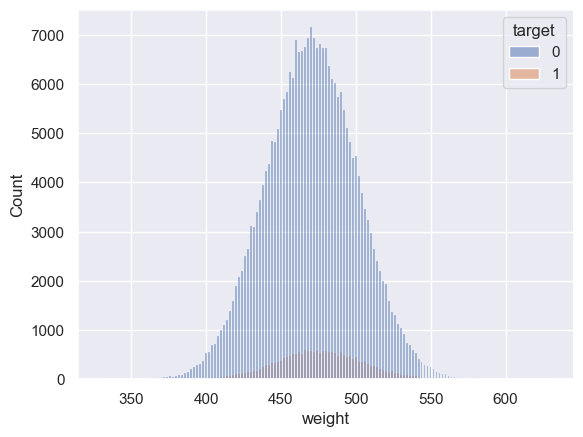

In [47]:
sns.histplot(df, x="weight", discrete=True, hue="target")

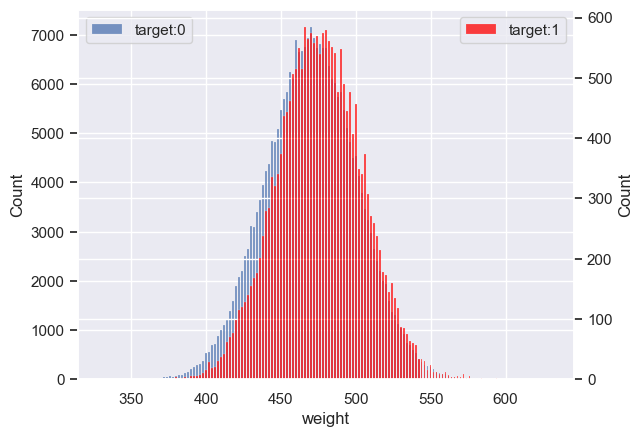

In [51]:
# 2重軸
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.histplot(
    df.query("target == 0"),
    x="weight",
    discrete=True,
    ax=ax1,
    label="target:0"
)
ax1.legend(loc="upper left")
sns.histplot(
    df.query("target == 1"),
    x="weight",
    discrete=True,
    ax=ax2,
    color="red",
    label="target:1"
)
ax2.legend()

Text(0, 0.5, 'count(target:1)')

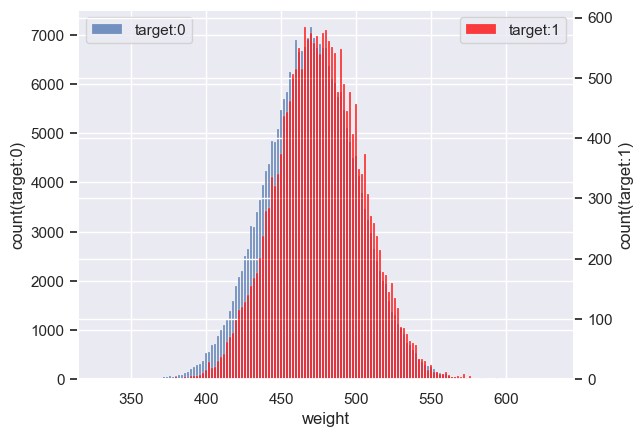

In [28]:
# 2重軸
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.histplot(
    df.query("target == 0"),
    x="weight",
    discrete=True,
    ax=ax1,
    label="target:0"
)
ax1.legend(loc="upper left")
ax1.set_ylabel("count(target:0)")

sns.histplot(
    df.query("target == 1"),
    x="weight",
    discrete=True,
    ax=ax2,
    color="red",
    label="target:1"
)
ax2.legend()
ax2.set_ylabel("count(target:1)")

<Axes: xlabel='rank_mean_10races_relative', ylabel='tansho_odds'>

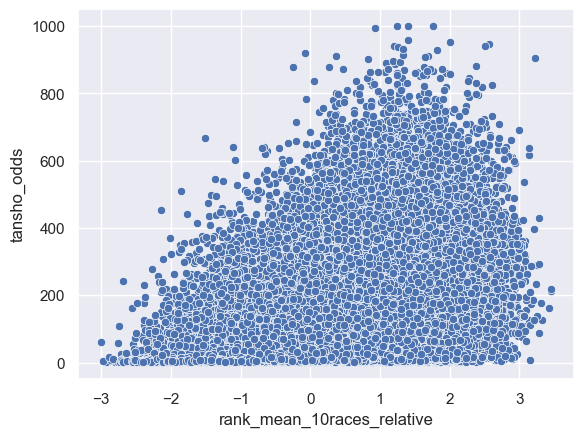

In [76]:
# 連続値 x 連続値の可視化
sns.scatterplot(data=df, x="rank_mean_10races_relative", y="tansho_odds")

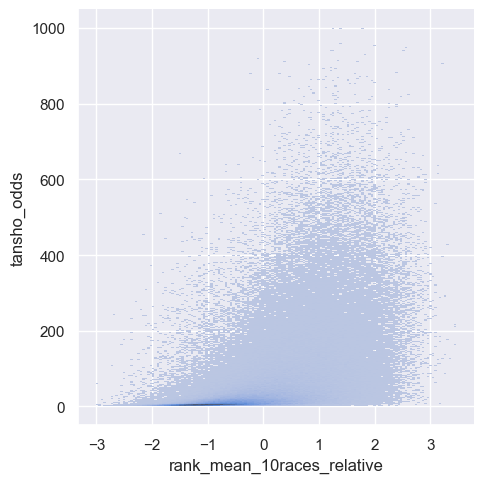

In [ ]:
sns.displot(data=df, x="rank_mean_10races_relative", y="tansho_odds")

In [52]:
# 体重変化
df["weight_diff"]

0          0
1          4
2         12
3          8
4         10
          ..
284763     4
284764    10
284765     2
284766    -4
284767    14
Name: weight_diff, Length: 284768, dtype: int64

<Axes: xlabel='weight_diff', ylabel='Count'>

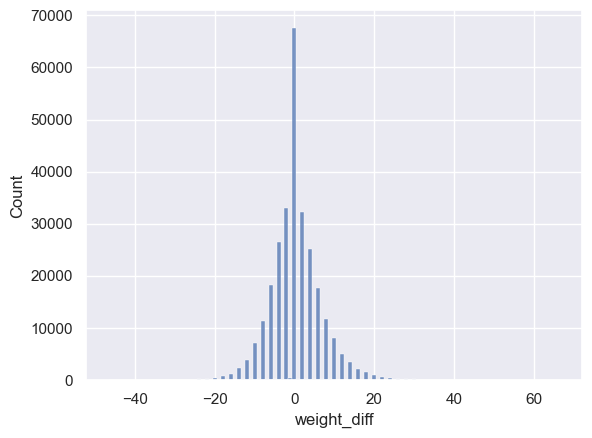

In [53]:
sns.histplot(df, x="weight_diff", discrete=True)

<Axes: xlabel='target', ylabel='weight_diff'>

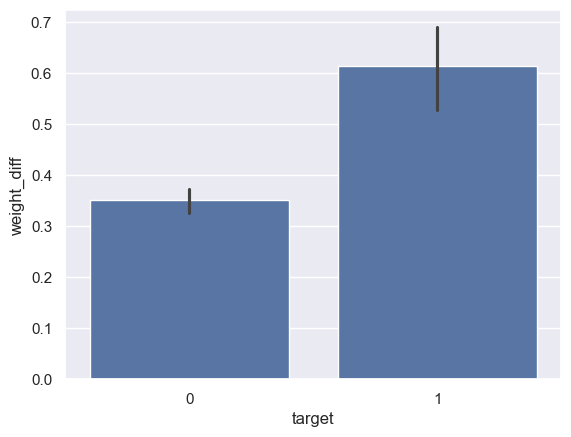

In [54]:
# 体重変化が+の方が勝率が高そう
sns.barplot(df, x="target", y="weight_diff")

In [9]:
# 「馬の過去成績」の欠損率
df["rank_3races"].isnull().mean()

0.09870139903359929

In [30]:
from feature_engineering import FeatureCreator

fc = FeatureCreator()
fc.create_baselog()

In [31]:
#それぞれの馬にどれだけのデータが使われているのか
n_races = fc.baselog[["race_id", "horse_id"]].value_counts().to_frame()
n_races

count
race_id      horse_id         
202206030810 2013103671     74
202309050610 2014100555     74
202309040201 2013103941     73
202305050310 2014100555     73
202209010411 2013103671     73
...                        ...
202305040303 2021104068      1
             2021101640      1
202205020904 2019110041      1
202305040302 2021106800      1
202201010101 2020100678      1

[85316 rows x 1 columns]

<Axes: xlabel='count', ylabel='Count'>

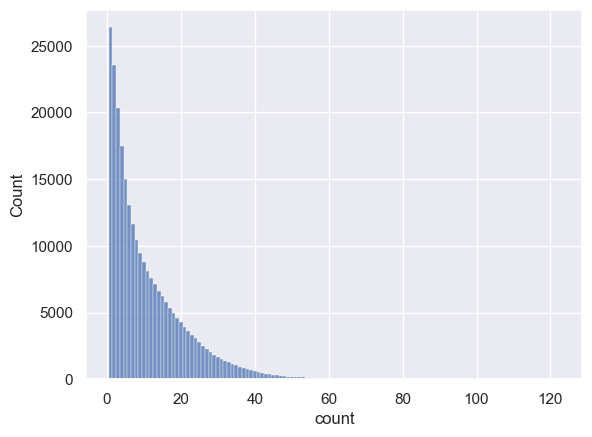

In [59]:
sns.histplot(n_races, x="count", discrete=True)

In [60]:
#中央値として、過去8レースを紐づけると全部になりそう
#windowサイズとされているので
n_races["count"].describe()

count    258813.000000
mean         11.025057
std          10.315446
min           1.000000
25%           3.000000
50%           8.000000
75%          16.000000
max         122.000000
Name: count, dtype: float64

window_size: 中央値くらいに設定すると良いらしい？

## 仮説を検証する分析

## 内枠・外枠の検証
- 芝は内枠有利だが、ダートは外枠有利
- 直線はコースが荒れていない外枠有利
- 馬場が整っている開催前半は内枠有利
- 雨の日など、馬場状態が悪い時には外枠有利
- ゲートから最初のコーナーまでの距離が短い方が内枠有利
    - コースによって異なる

{
    "右": 0,
    "左": 1,
    "直": 2
}

In [32]:
df["around"].value_counts(dropna=False)

around
0.0    55986
1.0    34722
NaN     2693
2.0      712
Name: count, dtype: int64

<Axes: xlabel='around', ylabel='target'>

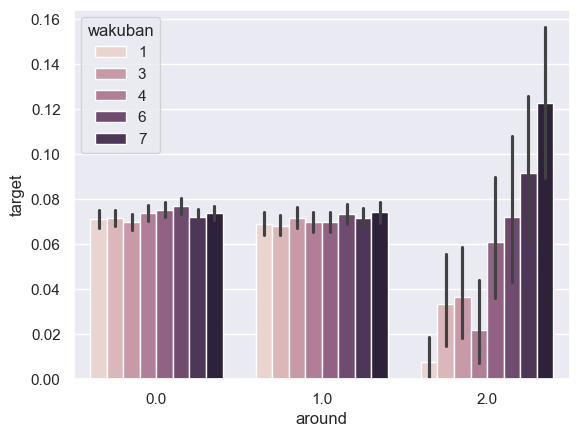

In [63]:
sns.barplot(df, x="around", y="target", hue="wakuban")

around x wakubanの特徴量は入れたい

{
    "良": 0,
    "重": 1,
    "稍": 2,
    "不": 3,
    "稍重": 2,
    "不良": 3
}

<Axes: xlabel='ground_state', ylabel='target'>

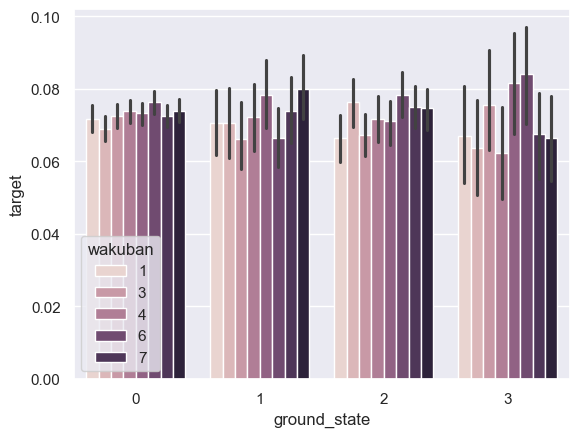

In [64]:
sns.barplot(df, x="ground_state", y="target", hue="wakuban")

## 出走間隔

In [33]:
fc.baselog

,race_id,date,horse_id,date_horse,rank,prize,rank_diff,weather,race_type,course_len,...,win,rentai,show,place,corner_1,corner_2,corner_3,corner_4,pase_1,pase_2
1523411,202309050903,2023-12-28,2021102811,2023-12-23,17.0,0.0,3.3,1.0,1,1400,...,0,0,0,9.0,13,15.0,NaN,NaN,34.8,34.8
1523347,202309050903,2023-12-28,2021105731,2023-12-23,12.0,0.0,1.6,1.0,1,1800,...,0,0,0,9.0,6,8.0,NaN,NaN,35.4,34.4
1523405,202309050903,2023-12-28,2021105018,2023-12-23,14.0,0.0,3.3,1.0,0,1200,...,0,0,0,9.0,10,12.0,NaN,NaN,35.6,38.0
1523388,202309050903,2023-12-28,2021104215,2023-12-23,14.0,0.0,2.0,1.0,1,1800,...,0,0,0,9.0,14,14.0,NaN,NaN,35.4,34.4
1511977,202306050704,2023-12-23,2021103822,2023-12-17,9.0,0.0,4.2,1.0,0,1800,...,0,0,0,6.0,14,14.0,12.0,13.0,38.3,40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244868,202206030711,2022-04-16,2011101125,2013-11-16,8.0,0.0,1.8,1.0,1,2000,...,0,0,0,5.0,12,12.0,12.0,NaN,37.1,34.4
244869,202206030711,2022-04-16,2011101125,2013-10-19,11.0,0.0,0.8,1.0,1,1800,...,0,0,0,5.0,15,14.0,11.0,NaN,38.0,34.4
799332,202206050710,2022-12-24,2011101125,2013-10-19,11.0,0.0,0.8,1.0,1,1800,...,0,0,0,5.0,15,14.0,11.0,NaN,38.0,34.4
647847,202205040509,2022-10-16,2011101125,2013-10-19,11.0,0.0,0.8,1.0,1,1800,...,0,0,0,5.0,15,14.0,11.0,NaN,38.0,34.4


In [67]:
fc.baselog.groupby(["race_id", "horse_id", "date"])["date_horse"].max()

race_id       horse_id    date      
201801010101  2016101840  2018-07-28    2018-07-21
              2016102801  2018-07-28    2018-07-15
              2016103821  2018-07-28    2018-07-15
              2016103985  2018-07-28    2018-07-22
              2016104880  2018-07-28    2018-07-08
                                           ...    
202310030812  2020103324  2023-09-03    2023-08-26
              2020103663  2023-09-03    2023-06-04
              2020103754  2023-09-03    2023-08-06
              2020105644  2023-09-03    2023-08-06
              2020106455  2023-09-03    2023-08-13
Name: date_horse, Length: 258813, dtype: object

In [68]:
latest_df = (
    fc.baselog
    .groupby(["race_id", "horse_id", "date"])["date_horse"]
    .max()
    .to_frame()
    .reset_index()
)

In [69]:
latest_df

,race_id,horse_id,date,date_horse
0,201801010101,2016101840,2018-07-28,2018-07-21
1,201801010101,2016102801,2018-07-28,2018-07-15
2,201801010101,2016103821,2018-07-28,2018-07-15
3,201801010101,2016103985,2018-07-28,2018-07-22
4,201801010101,2016104880,2018-07-28,2018-07-08
...,...,...,...,...
258808,202310030812,2020103324,2023-09-03,2023-08-26
258809,202310030812,2020103663,2023-09-03,2023-06-04
258810,202310030812,2020103754,2023-09-03,2023-08-06
258811,202310030812,2020105644,2023-09-03,2023-08-06


In [72]:
#出走間隔の表（土日開催なので一週間単位で）
latest_df["interval"] = (
    pd.to_datetime(latest_df["date"]) - pd.to_datetime(latest_df["date_horse"])
).dt.days

<Axes: xlabel='interval', ylabel='Count'>

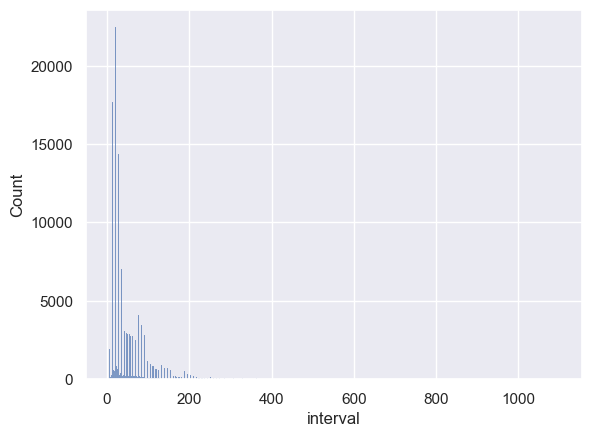

In [74]:
sns.histplot(latest_df, x="interval", discrete=True)

In [76]:
latest_df["interval"] = latest_df["interval"] // 7

<Axes: xlabel='interval', ylabel='Count'>

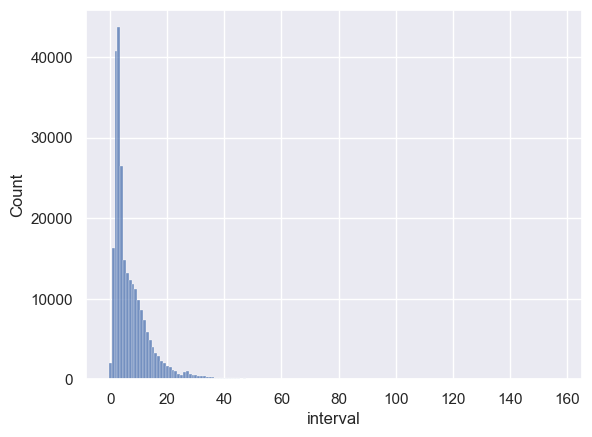

In [77]:
sns.histplot(latest_df, x="interval", discrete=True)

In [78]:
latest_df["interval"].value_counts()

interval
3      43693
2      40796
4      26431
1      16278
5      14821
       ...  
117        1
100        1
157        1
112        1
104        1
Name: count, Length: 128, dtype: int64

In [82]:
#targetを表に紐づける
df2 = latest_df.merge(
    df[["race_id", "horse_id", "target"]],
    on=["race_id", "horse_id"]
)

<Axes: xlabel='interval', ylabel='target'>

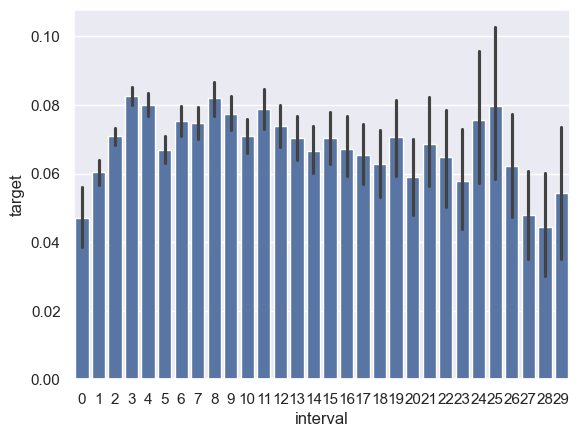

In [85]:
#データ数が多いので30で絞る
#標準誤差が大きい
sns.barplot(df2.query("interval < 30"), x="interval", y="target")

出走間隔は入れたい

## 夏は牝馬

{
    "牡": 0,
    "牝": 1,
    "セ": 2
}

In [35]:
df["sex"]

0        1
1        1
2        0
3        1
4        0
        ..
94108    0
94109    1
94110    0
94111    0
94112    0
Name: sex, Length: 94113, dtype: int64

In [36]:
#月毎の雄雌の勝敗
df["month"] = pd.to_datetime(df["date"]).dt.month
df["month"].value_counts(sort=False)

month
1     8551
2     8116
3     7405
4     8577
5     8043
6     7099
7     8701
8     7205
9     6572
10    8452
11    7266
12    8126
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='target'>

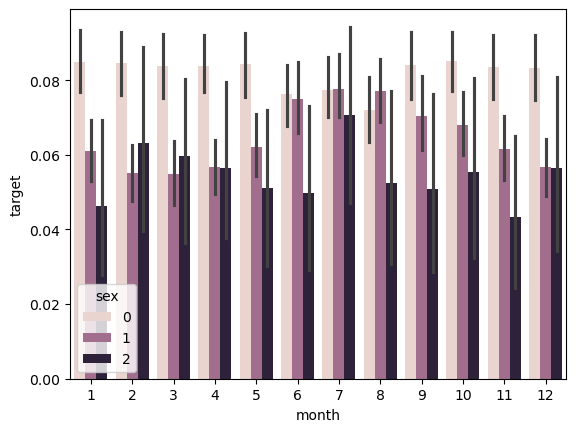

In [37]:
sns.barplot(df, x="month", y="target", hue="sex")

{
    "牡": 0,
    "牝": 1,
    "セ": 2
}

季節 x 性別も入れたい

<Axes: xlabel='month', ylabel='target'>

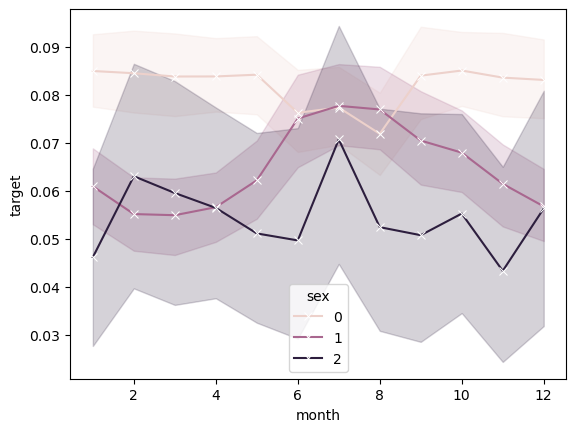

In [38]:
#カテゴリの比較と、時系列の比較もしたい場合
sns.lineplot(df, x="month", y="target", hue="sex", marker="x")

In [25]:
mix_races = df.groupby("race_id")[["sex"]].nunique().query("sex == 2").index

<Axes: xlabel='month', ylabel='target'>

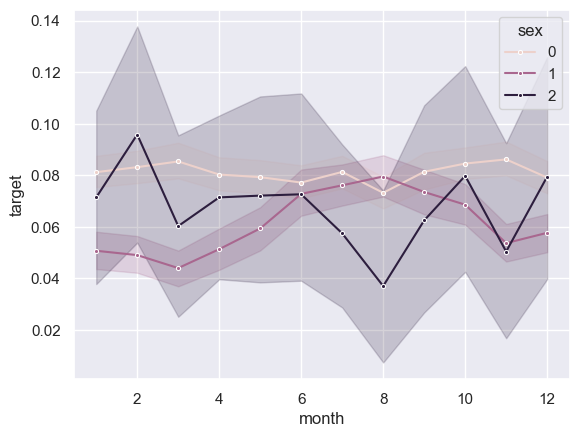

In [27]:
sns.lineplot(
    df.query("race_id in @mix_races"),
    x="month",
    y="target",
    hue="sex",
    marker="."
)

## 【深堀分析】競馬場ごとの枠順有利/不利

<Axes: xlabel='place', ylabel='count'>

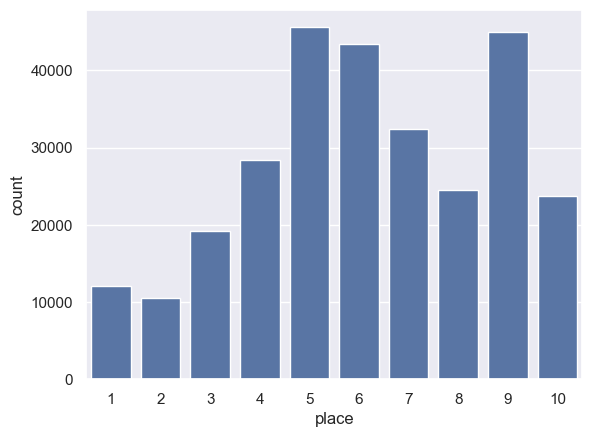

In [7]:
sns.countplot(df, x="place")

{
    "札幌": 1,
    "函館": 2,
    "福島": 3,
    "新潟": 4,
    "東京": 5,
    "中山": 6,
    "中京": 7,
    "京都": 8,
    "阪神": 9,
    "小倉": 10
}

In [11]:
# 1着だとぶれが大きいので
df["target"] = (df["rank"] <= 3).astype(int)

In [ ]:
df2 = df[["race_type", "course_len", "place", "target", "wakuban"]].dropna().astype(int)
df2["race_type_course_len"] = df2["race_type"].astype(str) + "_" + df2["course_len"].astype(str)
df2["type_count"] = df2.groupby(["place", "race_type_course_len"])["wakuban"].transform("count")
df2 = df2.query("type_count >= 1000")

<Axes: xlabel='race_type_course_len', ylabel='target'>

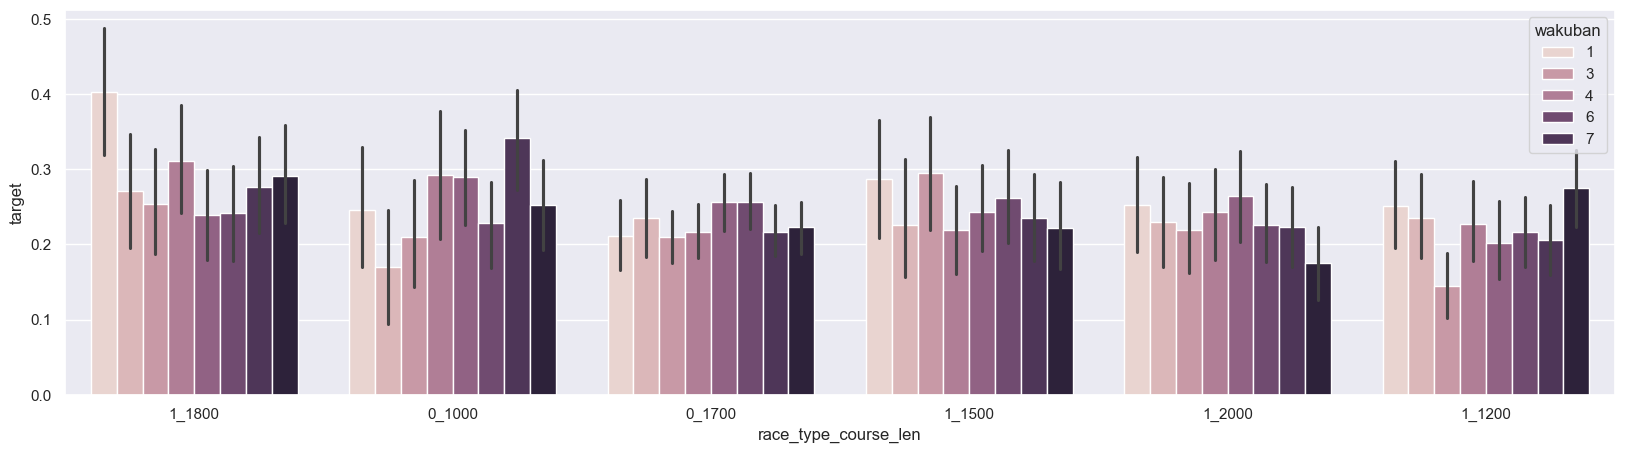

In [49]:
# 札幌競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 1"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

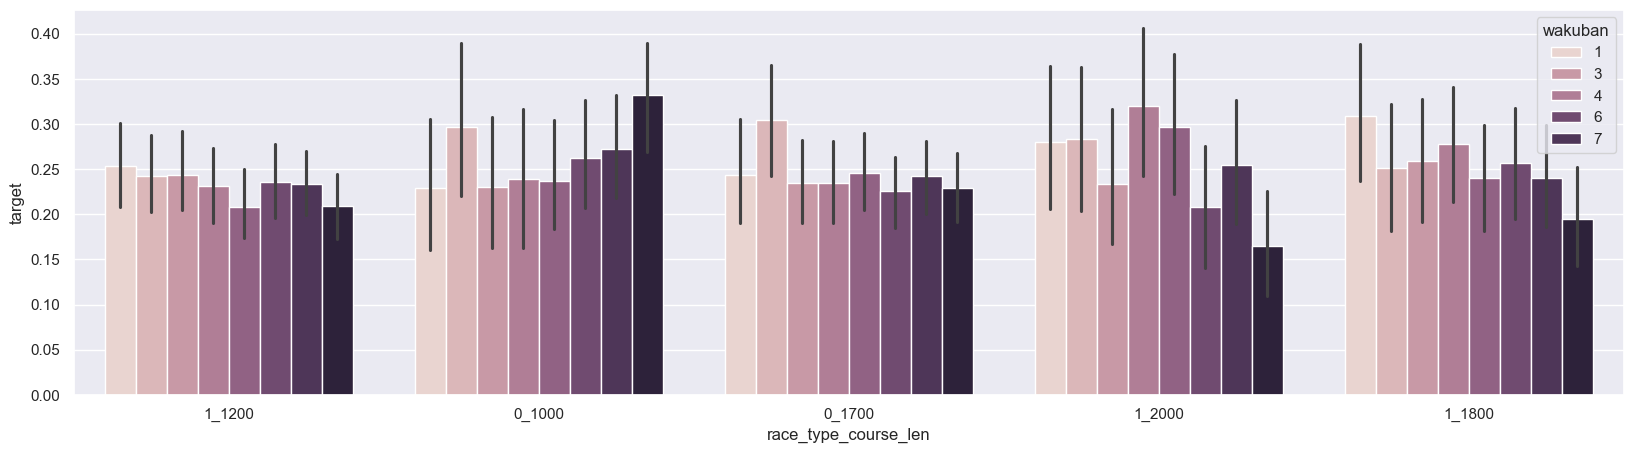

In [50]:
# 函館競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 2"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

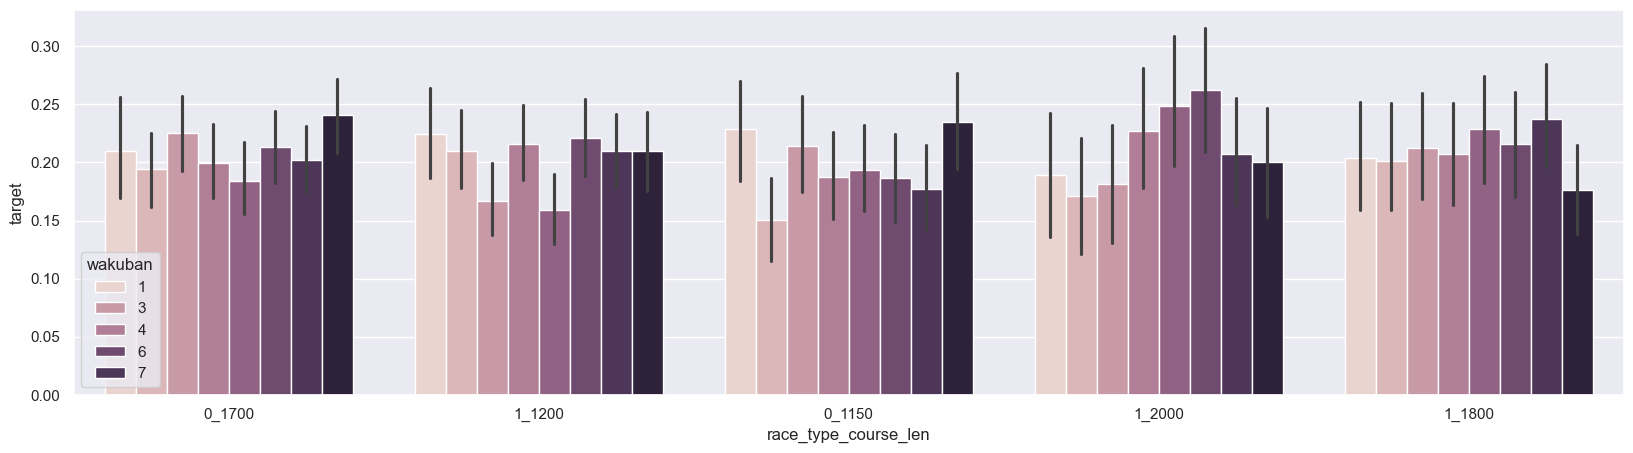

In [54]:
# 福島競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 3"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

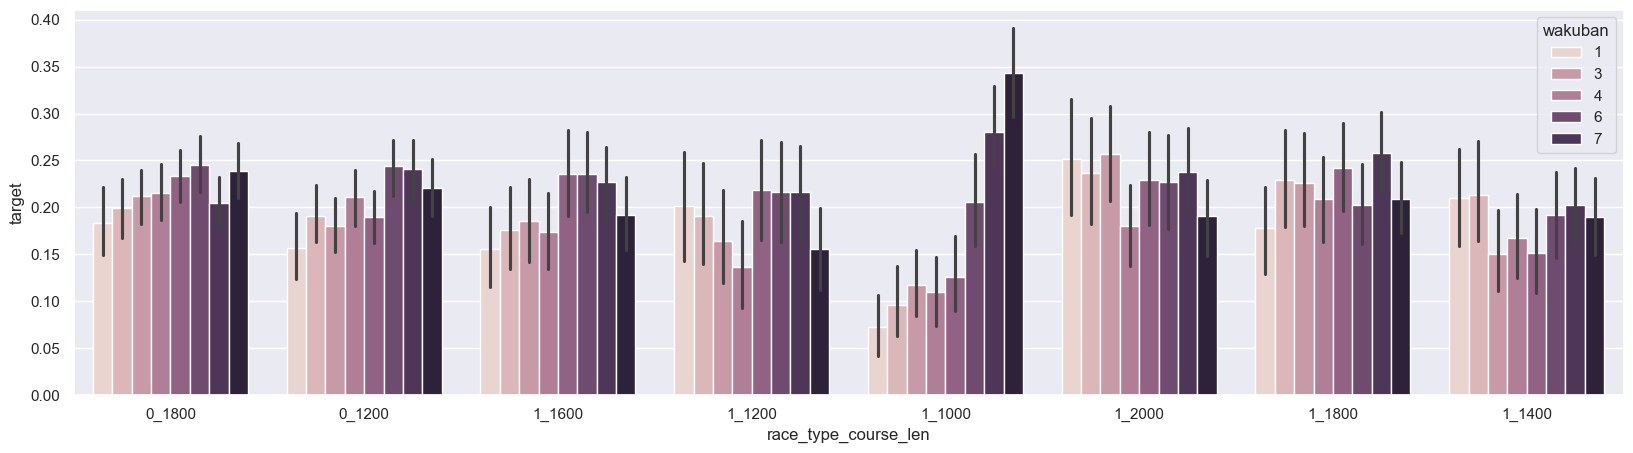

In [55]:
# 新潟競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 4"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

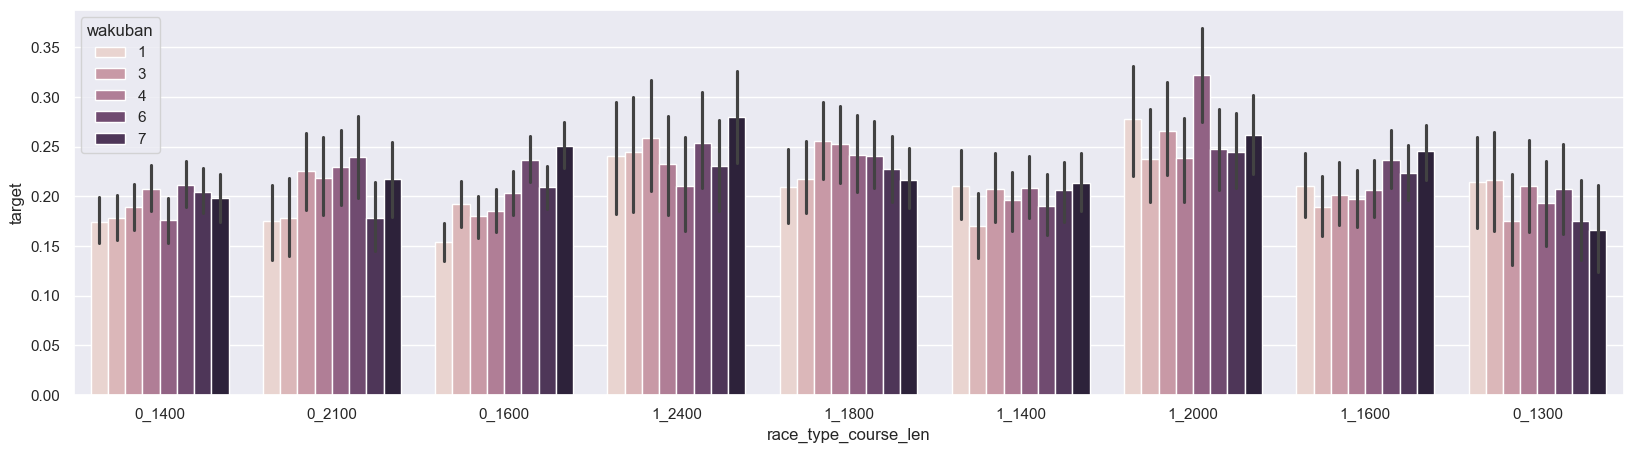

In [56]:
# 東京競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 5"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

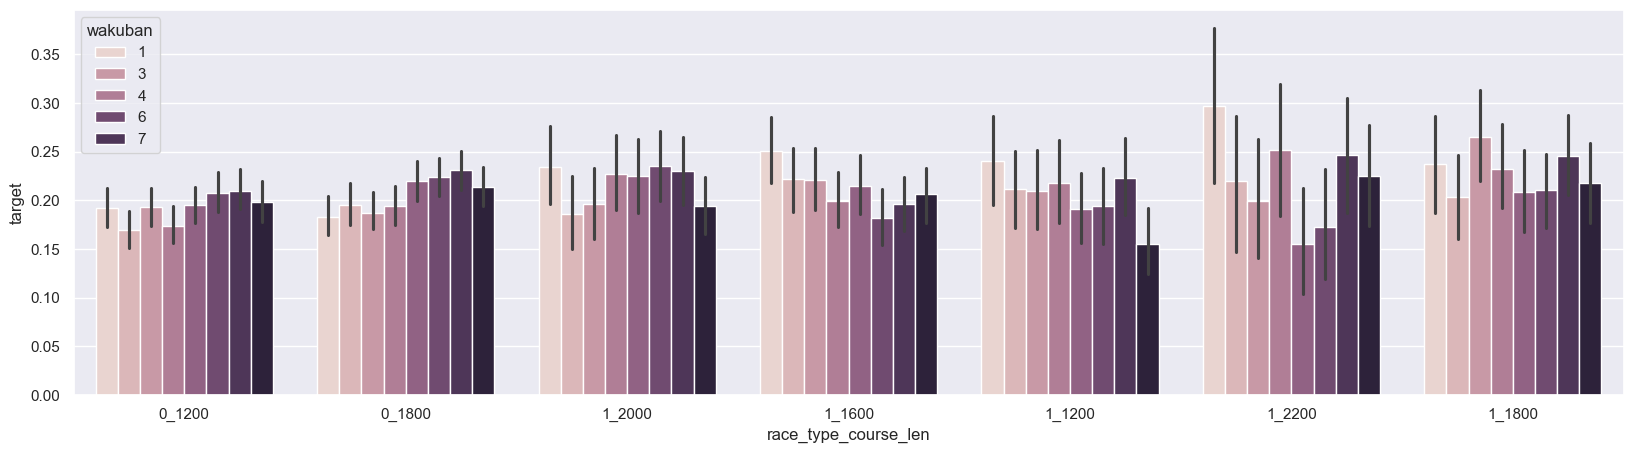

In [57]:
# 中山競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 6"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

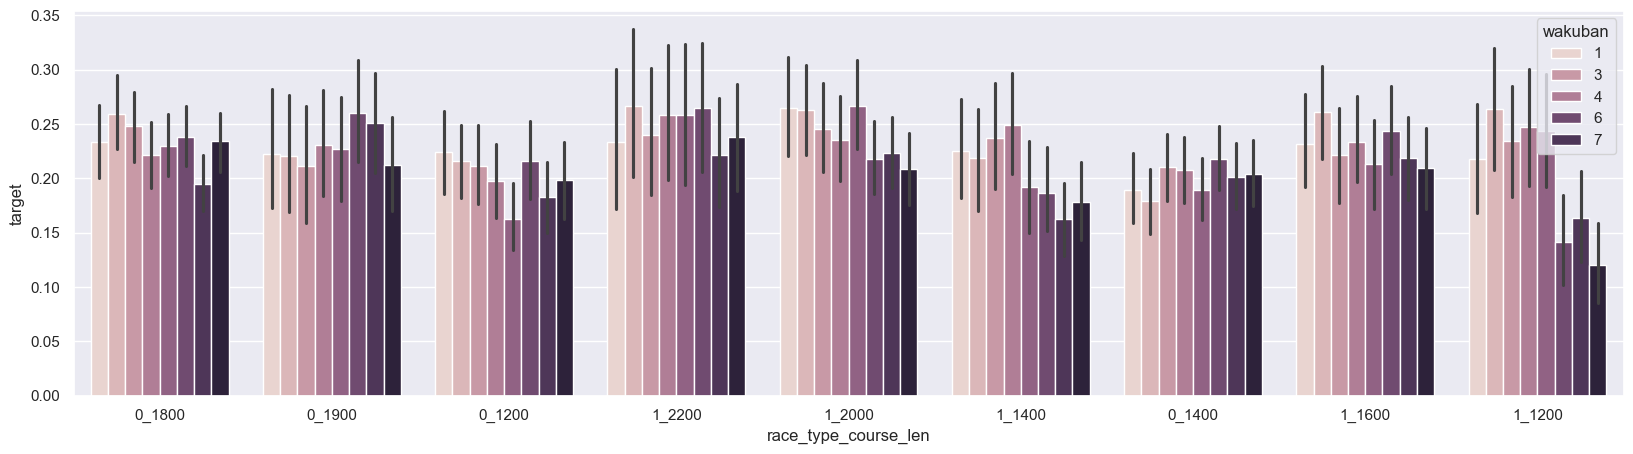

In [58]:
# 中京競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 7"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

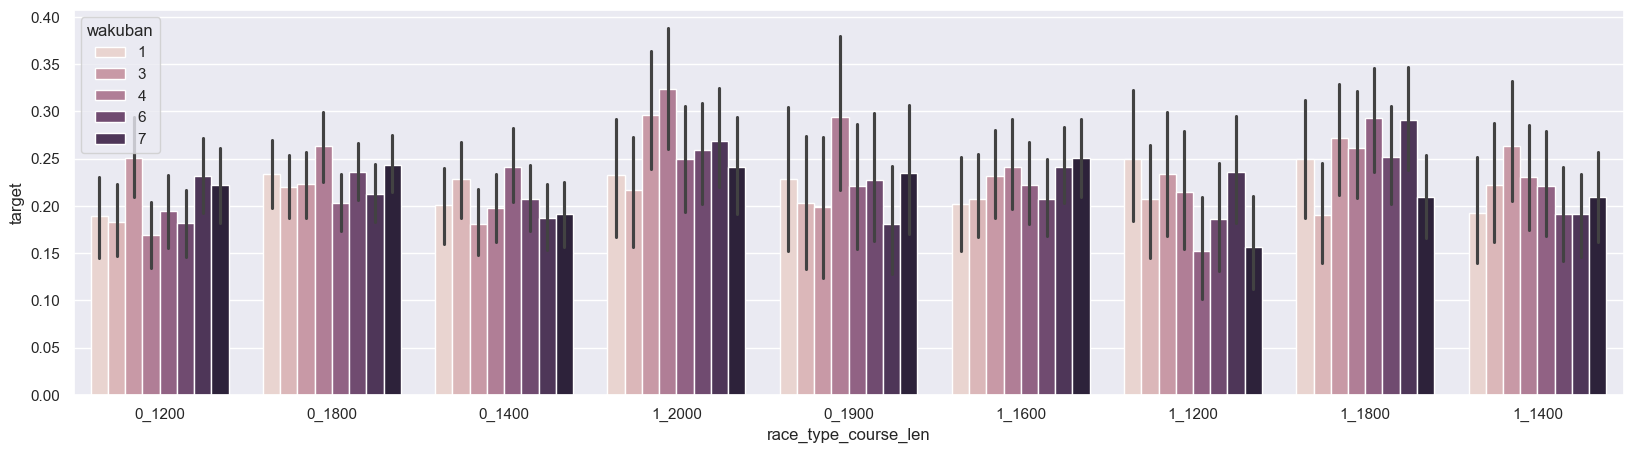

In [59]:
# 京都競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 8"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

{
    "札幌": 1,
    "函館": 2,
    "福島": 3,
    "新潟": 4,
    "東京": 5,
    "中山": 6,
    "中京": 7,
    "京都": 8,
    "阪神": 9,
    "小倉": 10
}

<Axes: xlabel='race_type_course_len', ylabel='target'>

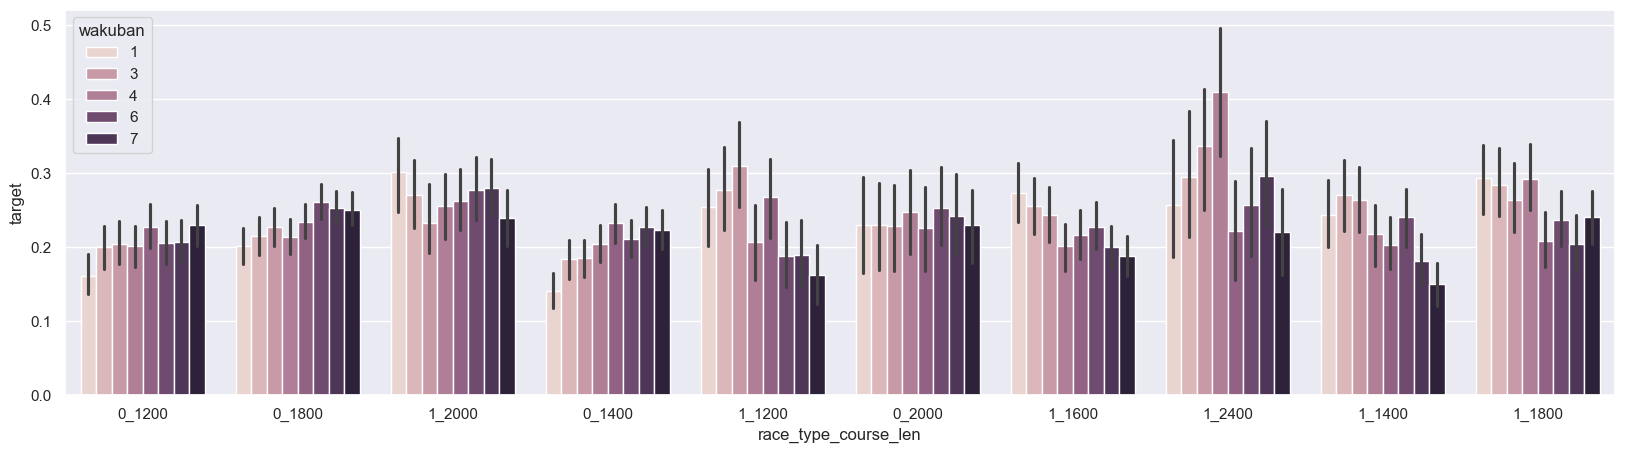

In [60]:
# 阪神競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 9"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

<Axes: xlabel='race_type_course_len', ylabel='target'>

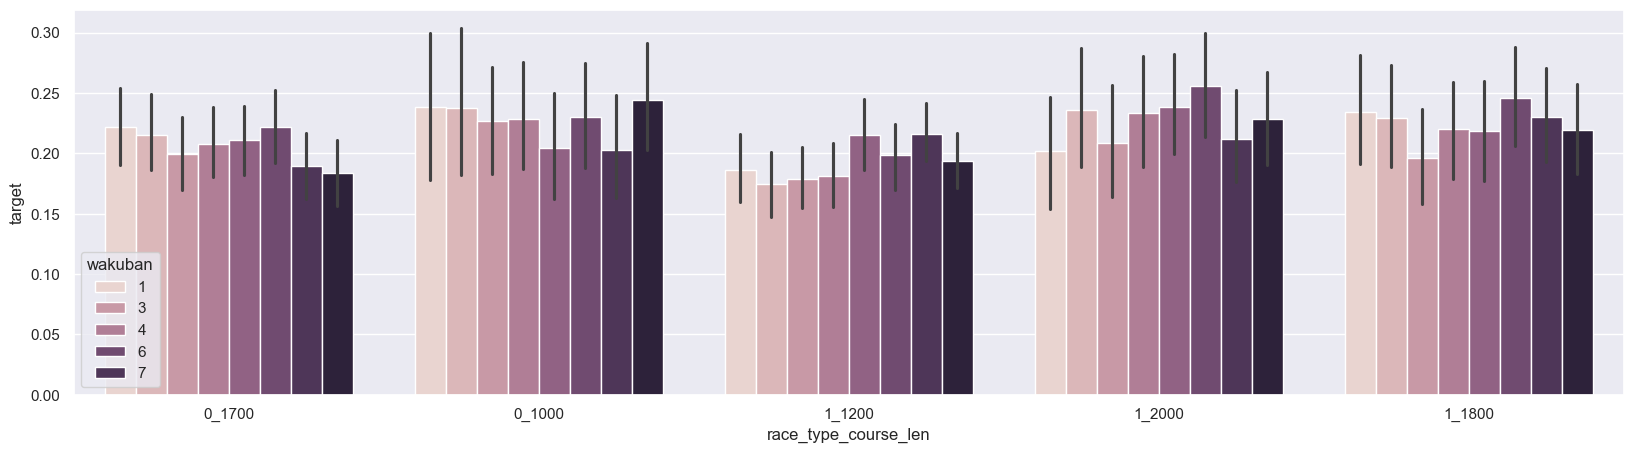

In [61]:
# 小倉競馬場
plt.figure(figsize=(20, 5))
sns.barplot(
    df2.query("place == 10"),
    x="race_type_course_len",
    y="target",
    hue="wakuban"
)

In [4]:
df

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,rank_per_horse,time,nobori,...,win_mean_10races_per_weather_relative,win_max_10races_per_weather_relative,win_min_10races_per_weather_relative,show_mean_10races_per_weather_relative,show_max_10races_per_weather_relative,show_min_10races_per_weather_relative,sire_n_races_relative,sire_n_wins_relative,sire_winrate_relative,sire_course_len_diff_relative
0,201606010101,2016-01-05,2013100513,689,1094,674004,1,0.0625,73.2,38.6,...,NaN,NaN,NaN,0.675199,0.677003,-0.552771,NaN,NaN,NaN,NaN
1,201606010101,2016-01-05,2013102845,1122,1089,281008,2,0.1250,73.2,38.4,...,NaN,NaN,NaN,0.076500,0.677003,-0.552771,NaN,NaN,NaN,NaN
2,201606010101,2016-01-05,2013102932,733,1103,978800,3,0.1875,73.3,38.5,...,NaN,NaN,NaN,1.273898,0.677003,1.658312,NaN,NaN,NaN,NaN
3,201606010101,2016-01-05,2013103416,1127,1043,129005,4,0.2500,73.3,38.9,...,NaN,NaN,NaN,0.076500,0.677003,-0.552771,NaN,NaN,NaN,NaN
4,201606010101,2016-01-05,2013100107,684,415,270006,5,0.3125,73.7,38.6,...,NaN,NaN,NaN,0.475633,0.677003,-0.552771,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379457,202309050912,2023-12-28,2017104873,1154,425,758005,12,0.7500,69.5,33.6,...,-1.437777,-2.561738,NaN,-0.991184,NaN,NaN,1.299880,1.269922,0.160283,-0.807546
379458,202309050912,2023-12-28,2019100653,1138,1158,950006,13,0.8125,69.5,34.2,...,-0.444167,0.365963,NaN,-1.380550,NaN,NaN,-0.532798,-0.616819,-0.501468,0.108645
379459,202309050912,2023-12-28,2017106240,1018,1178,258033,14,0.8750,69.6,34.5,...,-0.642889,0.365963,NaN,-0.472029,NaN,NaN,-0.241709,-0.616819,-0.876060,0.319818
379460,202309050912,2023-12-28,2018103205,1112,428,629800,15,0.9375,69.8,34.9,...,-0.642889,0.365963,NaN,-0.991184,NaN,NaN,-0.663492,-0.674873,-0.425169,0.055911


In [28]:
#枠番ごとのタイム
#馬番ごとのタイム
#レースランクごとのタイム
#天気ごとのタイム
#馬場状態ごとのタイム
#性別ごとのタイム
#直線コースごとのタイム

#これらを調べてtimeどのくらい+するか考える

# "target" 列を作成（time を整数型に変換）
df["target"] = df["time"].astype(int)

# 必要な列を選択して、データを整理
df2 = df[["race_type", "course_len", "place", "target", "wakuban","umaban","race_class","weather","ground_state","sex","around"]].dropna().astype(int)

# race_type と course_len の組み合わせ列を作成
df2["race_type_course_len"] = df2["race_type"].astype(str) + "_" + df2["course_len"].astype(str)


# plt.figure(figsize=(20, 5))
# ax = sns.barplot(
#     data=df2_grouped,
#     x="race_type_course_len",
#     y="target",
#     hue="wakuban",  # 枠番ごとに色分け
#     palette="viridis"  # 好みのカラーパレットに変更可能
# )


# plt.title("wakuban_mean_sapporo", fontsize=16)
# plt.xlabel("race_type+course_len", fontsize=12)
# plt.ylabel("target", fontsize=12)
# plt.legend(title="wakuban", fontsize=10)
# plt.show()


In [23]:
# 札幌競馬場
# 枠番ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 1")  # 札幌競馬場のみを対象
    .groupby(["race_type_course_len", "wakuban"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="wakuban",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")



race_type_course_len,0_1000,0_1700,0_2400,1_1000,1_1200,1_1500,1_1800,1_2000,1_2600
wakuban,,,,,,,,,
1,59.76,107.99,158.88,57.00,69.95,90.29,110.39,122.70,162.76
2,60.01,107.86,158.00,57.00,69.77,90.40,110.39,122.84,163.21
3,59.91,107.89,156.88,58.00,69.94,90.19,110.23,122.55,163.50
4,59.91,107.71,157.88,57.50,69.77,90.33,110.15,122.77,162.98
5,59.76,107.66,157.86,57.50,69.89,90.51,110.16,122.64,163.14
6,59.81,107.72,157.60,60.00,69.72,90.27,110.09,122.67,163.19
7,59.63,107.69,157.38,56.50,69.84,90.40,110.07,122.75,163.92
8,59.83,107.83,158.00,57.00,69.85,90.47,110.12,122.70,163.06


In [26]:
# 枠番ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "wakuban"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="wakuban",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
wakuban,,,,,,,,,,,,,,,
1,79.79,86.00,98.87,133.26,82.34,95.20,108.41,121.17,141.56,146.72,151.94,211.86,208.76,211.00,209.50
2,79.75,86.01,98.85,133.13,82.38,95.20,108.38,121.09,140.67,146.76,151.88,211.71,208.05,209.00,208.64
3,79.71,85.97,98.97,132.98,82.39,95.09,108.38,121.09,141.00,146.91,151.65,211.75,210.19,209.50,210.35
4,79.75,85.94,98.85,133.28,82.40,95.17,108.30,121.08,141.00,146.80,151.94,211.62,209.54,210.67,208.50
5,79.83,86.00,98.73,133.10,82.31,95.09,108.29,121.04,140.42,146.96,151.59,211.88,209.23,211.00,209.00
6,79.79,85.93,98.71,132.97,82.27,95.03,108.40,121.13,140.85,146.74,151.94,211.88,209.81,211.50,209.48
7,79.91,85.92,98.75,133.16,82.35,95.03,108.36,121.06,141.45,146.67,151.74,211.75,208.30,209.50,209.33
8,80.00,85.91,98.65,133.28,82.27,95.04,108.26,121.10,141.14,146.80,151.59,212.50,208.68,211.00,209.68


In [25]:
# 枠番ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#中山  
    .groupby(["race_type_course_len", "wakuban"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="wakuban",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
wakuban,,,,,,,,,,,,,,,,,,
1,72.77,116.39,157.56,165.25,69.47,95.80,110.07,228.20,123.15,136.48,155.00,197.00,216.83,223.25,226.75,241.50,284.60,295.33
2,72.81,116.48,157.04,164.40,69.52,95.79,110.18,229.17,123.29,136.48,155.00,198.50,215.80,222.00,227.00,243.00,288.20,297.00
3,72.81,116.35,157.21,164.40,69.40,95.77,110.01,228.71,123.25,136.39,155.07,198.87,217.25,221.43,227.50,242.50,288.00,301.25
4,72.81,116.34,156.76,165.60,69.42,95.82,109.92,228.62,123.23,136.15,155.03,198.16,215.67,221.50,227.43,243.71,284.75,300.25
5,72.72,116.26,156.71,164.80,69.49,95.87,110.07,228.62,123.19,136.35,154.97,198.21,216.62,222.86,228.14,243.43,285.71,298.50
6,72.70,116.30,156.82,164.50,69.52,95.76,110.18,228.12,123.12,136.19,155.34,198.25,217.10,224.12,227.14,242.71,285.00,298.60
7,72.68,116.24,156.69,164.62,69.48,95.78,109.95,228.75,123.15,136.29,155.22,197.65,216.17,223.50,228.00,245.50,285.62,294.50
8,72.71,116.28,156.85,165.38,69.50,95.87,110.01,229.00,123.20,136.24,155.09,198.30,216.36,224.00,226.33,243.80,286.57,301.14


In [31]:
# 馬番ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "umaban"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="umaban",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
umaban,,,,,,,,,,,,,,,
1,79.94,85.97,98.95,133.33,82.30,95.19,108.36,121.24,141.56,146.79,152.22,211.50,208.76,211.00,209.50
2,79.69,86.08,98.76,133.23,82.37,95.14,108.26,121.15,140.67,146.73,151.78,212.00,208.05,209.00,208.64
3,79.66,86.06,98.81,133.23,82.34,95.14,108.54,121.20,141.22,146.78,152.00,211.50,210.14,209.50,210.33
4,79.77,85.97,98.86,133.07,82.35,95.29,108.26,121.16,140.78,146.86,152.22,211.50,209.82,212.00,210.08
5,79.73,85.97,98.98,132.83,82.27,95.08,108.32,121.17,140.88,146.97,151.33,212.00,208.00,210.00,208.50
6,79.68,85.91,98.90,133.03,82.36,95.01,108.32,121.14,140.33,146.85,151.78,211.50,209.43,211.50,209.67
7,79.82,85.95,98.81,133.42,82.31,95.04,108.24,121.16,141.38,146.76,152.00,211.50,209.75,210.50,208.42
8,79.63,85.99,98.73,132.97,82.40,95.21,108.24,121.04,141.38,146.80,151.75,211.75,209.45,211.00,210.67
9,79.93,86.00,98.83,132.97,82.31,95.04,108.39,121.08,141.50,146.87,151.38,212.50,208.42,212.00,209.09


In [30]:
# レースランクごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#中山
    .groupby(["race_type_course_len", "umaban"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="umaban",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
umaban,,,,,,,,,,,,,,,,,,
1,72.75,116.35,157.92,166.00,69.36,95.77,109.94,228.75,123.10,136.25,155.12,197.00,216.83,223.25,226.75,241.50,285.50,295.33
2,72.71,116.33,157.32,164.50,69.53,95.65,109.98,228.50,123.19,136.13,155.20,198.50,215.80,222.00,227.00,243.00,284.25,297.00
3,72.83,116.39,157.37,163.75,69.37,95.67,110.01,229.25,123.15,136.49,155.05,199.00,217.33,221.00,227.50,241.75,285.50,301.25
4,72.77,116.34,157.00,166.00,69.54,95.62,109.96,228.25,123.35,136.17,155.10,197.92,217.40,221.75,226.75,244.00,291.67,300.25
5,72.81,116.33,157.49,165.25,69.42,95.70,109.85,228.50,123.22,136.23,155.00,198.24,215.40,221.25,227.50,246.25,285.00,298.50
6,72.77,116.31,157.24,164.75,69.36,95.75,109.99,228.50,123.31,136.13,155.15,198.31,215.83,221.75,226.25,243.25,289.00,296.00
7,72.78,116.26,156.42,164.50,69.41,95.78,109.99,228.75,123.21,136.25,155.10,198.75,216.40,223.00,229.00,243.50,286.00,297.50
8,72.76,116.23,156.81,164.25,69.40,95.78,109.95,229.25,123.19,136.25,155.39,197.09,218.00,224.00,227.25,242.25,286.00,298.33
9,72.70,116.30,156.66,165.00,69.42,95.87,110.07,228.00,123.04,136.45,155.30,198.06,217.67,224.00,227.75,242.00,284.50,300.00


In [32]:
# レースランクごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "race_class"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="race_class",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
race_class,,,,,,,,,,,,,,,
0,81.23,88.31,101.50,nan,84.28,97.33,110.70,123.92,nan,nan,nan,nan,nan,nan,nan
1,80.46,87.09,99.85,135.32,82.82,95.47,108.77,122.00,141.47,148.80,nan,nan,209.10,nan,nan
2,79.03,85.54,98.34,132.99,82.15,94.24,107.55,120.66,140.51,147.16,nan,nan,nan,nan,nan
3,78.54,84.88,97.46,132.62,81.71,94.37,107.47,120.30,nan,146.54,152.71,nan,nan,nan,nan
4,78.08,84.22,96.85,131.32,80.98,93.28,106.84,119.55,nan,146.22,nan,nan,nan,nan,nan
5,78.12,84.12,96.70,130.98,81.26,94.12,106.95,120.05,nan,146.41,nan,nan,nan,210.48,207.75
6,nan,83.16,95.90,nan,nan,94.09,107.44,nan,nan,nan,nan,211.87,nan,nan,208.50
7,nan,nan,nan,nan,80.94,93.05,105.95,119.64,nan,144.76,151.73,nan,nan,nan,212.16
8,nan,nan,95.70,nan,nan,92.42,nan,117.78,nan,144.57,nan,nan,nan,nan,nan


In [34]:
# 枠番ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#中山 
    .groupby(["race_type_course_len", "race_class"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="race_class",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")

race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
race_class,,,,,,,,,,,,,,,,,,
0,74.67,119.45,nan,nan,71.31,97.70,112.37,nan,125.77,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,73.60,117.54,nan,nan,70.28,96.50,111.01,nan,123.64,137.69,nan,198.14,nan,nan,nan,nan,nan,nan
2,72.17,115.25,157.90,164.85,69.72,95.41,109.28,nan,122.59,136.45,156.01,nan,nan,nan,nan,nan,nan,nan
3,71.68,114.46,156.04,nan,69.37,95.15,109.43,nan,121.99,136.28,155.61,nan,nan,nan,nan,nan,nan,nan
4,71.09,113.31,nan,nan,68.63,94.28,108.86,nan,121.23,134.63,155.13,nan,nan,nan,nan,nan,nan,nan
5,70.79,113.56,156.32,nan,68.75,94.76,108.70,nan,122.11,nan,154.90,nan,216.48,222.88,227.37,243.44,nan,nan
6,70.02,111.78,nan,nan,68.17,93.85,110.31,nan,121.08,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,94.08,108.59,228.66,120.83,134.12,155.41,nan,nan,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,68.16,nan,nan,nan,121.52,nan,153.30,nan,nan,nan,nan,nan,286.04,298.66


In [35]:
# 天気ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
weather,,,,,,,,,,,,,,,
0,78.53,85.09,97.50,131.66,81.76,94.61,109.91,122.44,140.15,147.29,nan,nan,213.38,nan,nan
1,80.06,86.12,98.93,133.47,82.20,94.93,108.31,120.80,141.35,146.58,152.04,211.56,208.09,212.58,207.92
2,79.58,85.71,98.74,132.86,82.34,94.94,107.98,121.28,140.08,146.17,151.31,212.20,208.63,208.18,210.89
3,79.70,85.98,98.37,131.74,84.01,97.13,109.84,123.55,nan,150.20,nan,nan,214.12,nan,nan


In [36]:
# 天気ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#東京  
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
weather,,,,,,,,,,,,,,,,,,
0,72.27,115.78,nan,nan,70.14,96.54,110.92,233.27,124.15,138.90,156.69,199.44,nan,230.43,226.30,245.64,nan,nan
1,72.81,116.42,157.04,164.89,69.08,95.55,109.37,227.17,122.70,135.57,154.97,197.78,216.48,nan,225.50,242.83,286.04,294.33
2,72.67,116.32,156.92,164.81,69.50,95.86,110.39,226.79,123.43,136.27,155.08,197.92,nan,220.11,227.07,242.69,nan,293.50
3,72.83,115.82,157.09,nan,71.75,98.39,113.24,nan,127.08,139.58,155.58,200.70,nan,nan,230.23,nan,nan,303.11
4,72.34,nan,159.43,nan,nan,nan,nan,nan,126.25,nan,nan,200.25,nan,nan,nan,nan,nan,nan
5,nan,119.19,153.44,nan,71.31,nan,110.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [38]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "ground_state"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="ground_state",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
ground_state,,,,,,,,,,,,,,,
0,79.99,86.30,99.14,133.82,82.07,94.84,108.16,120.87,141.00,146.39,151.77,211.87,207.79,210.48,208.39
1,79.03,84.90,97.35,131.59,83.59,96.97,108.81,120.61,nan,146.73,nan,nan,215.56,nan,214.58
2,79.86,85.64,98.74,132.66,82.80,95.61,108.93,122.10,nan,147.97,nan,nan,209.42,nan,211.60
3,79.25,85.45,97.88,132.07,85.41,99.56,111.61,125.62,nan,153.83,nan,nan,213.38,nan,nan


In [39]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#東京  
    .groupby(["race_type_course_len", "ground_state"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="ground_state",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
ground_state,,,,,,,,,,,,,,,,,,
0,72.89,116.64,157.44,164.85,69.15,95.49,109.40,227.05,122.79,135.51,154.68,197.53,216.25,217.82,226.35,242.78,284.89,293.50
1,72.06,114.87,156.44,nan,70.20,96.63,111.09,nan,123.81,138.70,156.34,200.61,nan,nan,230.23,nan,nan,298.10
2,72.86,116.51,156.69,nan,69.87,96.42,110.63,233.27,123.62,136.51,156.00,198.59,217.80,221.04,226.30,245.64,289.00,294.33
3,72.06,114.77,153.74,nan,72.35,98.85,114.24,nan,128.67,141.21,158.67,202.00,nan,230.43,nan,nan,nan,309.38


In [40]:
# 性別ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "sex"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="sex",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
sex,,,,,,,,,,,,,,,
0,79.66,85.67,98.64,133.15,82.24,94.86,108.37,121.09,141.01,146.70,151.72,211.98,209.05,210.50,209.13
1,80.13,86.47,99.21,133.91,82.42,95.37,108.38,121.18,141.24,146.81,151.50,212.43,210.28,nan,206.00
2,79.10,85.18,98.07,132.56,82.09,94.14,107.62,120.50,139.75,147.63,152.12,210.57,208.81,210.40,210.06


In [41]:
# 性別ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#東京  
    .groupby(["race_type_course_len", "sex"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="sex",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
sex,,,,,,,,,,,,,,,,,,
0,72.47,116.13,156.86,164.74,69.33,95.54,110.08,228.84,123.08,136.20,155.06,198.01,216.13,222.28,227.44,243.56,286.27,298.74
1,73.10,116.92,157.50,165.00,69.60,96.07,110.11,227.20,123.44,136.75,155.11,199.28,nan,235.00,232.00,248.00,nan,nan
2,72.03,115.37,157.07,167.00,69.11,95.21,109.05,228.69,122.47,135.95,155.35,197.86,217.17,224.00,226.94,242.86,285.00,298.00


In [42]:
# レース形状ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 5")#東京  
    .groupby(["race_type_course_len", "around"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="around",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1300,0_1400,0_1600,0_2100,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
around,,,,,,,,,,,,,,,
1,79.82,85.96,98.79,133.14,82.34,95.10,108.34,121.09,141.00,146.79,151.77,211.87,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,209.10,210.48,209.33


In [43]:
# レース形状ごとの平均タイムを計算
df2_grouped = (
    df2.query("place == 6")#東京  
    .groupby(["race_type_course_len", "around"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="around",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,0_1200,0_1800,0_2400,0_2500,1_1200,1_1600,1_1800,1_2,1_2000,1_2200,1_2500,2_2880,2_3200,2_3210,2_3350,2_3570,2_4100,2_4250
around,,,,,,,,,,,,,,,,,,
0,72.75,116.33,156.93,164.85,69.47,95.81,110.05,228.66,123.19,136.31,155.10,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,198.14,216.48,222.88,227.37,243.44,286.04,298.66


### 単勝オッズと相関の高い特徴量を調べる

In [4]:
import pandas as pd

# 数値型の列だけを抽出
numeric_df = df.select_dtypes(include=['number'])

# 必要な列名をリストとして定義
columns_to_add = [
    "race_id", "horse_id", "jockey_id", "trainer_id", "umaban", "wakuban", 
    "tansho_odds", "popularity", "impost", "sex", "age", "weight", "weight_diff", 
    "n_horses", "race_type", "around", "course_len", "weather", "ground_state", 
    "race_class", "place", "rank_2races", "rank_per_horse_2races", "prize_2races", 
    "rank_3races", "rank_per_horse_3races", "prize_3races", "rank_5races", 
    "rank_per_horse_5races", "prize_5races", "rank_10races", "rank_per_horse_10races", 
    "prize_10races", "rank_1000races", "rank_per_horse_1000races", "prize_1000races", 
    "rank_mean_1races_relative", "rank_max_1races_relative", "rank_min_1races_relative", 
    "rank_per_horse_mean_1races_relative", "rank_per_horse_max_1races_relative", 
    "rank_per_horse_min_1races_relative", "prize_mean_1races_relative", 
    "prize_max_1races_relative", "prize_min_1races_relative", "rank_diff_mean_1races_relative", 
    "rank_diff_max_1races_relative", "rank_diff_min_1races_relative", 
    "course_len_mean_1races_relative", "course_len_max_1races_relative", 
    "course_len_min_1races_relative", "race_class_mean_1races_relative", 
    "race_class_max_1races_relative", "race_class_min_1races_relative", 
    "n_horses_mean_1races_relative", "n_horses_max_1races_relative", 
    "n_horses_min_1races_relative", "nobori_mean_1races_relative", "nobori_max_1races_relative", 
    "nobori_min_1races_relative", "corner_1_per_horse_mean_1races_relative", 
    "corner_1_per_horse_max_1races_relative", "corner_1_per_horse_min_1races_relative", 
    "corner_2_per_horse_mean_1races_relative", "corner_2_per_horse_max_1races_relative", 
    "corner_2_per_horse_min_1races_relative", "corner_3_per_horse_mean_1races_relative", 
    "corner_3_per_horse_max_1races_relative", "corner_3_per_horse_min_1races_relative", 
    "corner_4_per_horse_mean_1races_relative", "corner_4_per_horse_max_1races_relative", 
    "corner_4_per_horse_min_1races_relative", "pase_1_mean_1races_relative", 
    "pase_1_max_1races_relative", "pase_1_min_1races_relative", "rank_mean_5races_relative", 
    "rank_max_5races_relative", "rank_min_5races_relative", "rank_per_horse_mean_5races_relative", 
    "rank_per_horse_max_5races_relative", "rank_per_horse_min_5races_relative", 
    "prize_mean_5races_relative", "prize_max_5races_relative", "prize_min_5races_relative", 
    "rank_diff_mean_5races_relative", "rank_diff_max_5races_relative", "rank_diff_min_5races_relative", 
    "course_len_mean_5races_relative", "course_len_max_5races_relative", 
    "course_len_min_5races_relative", "race_class_mean_5races_relative", 
    "race_class_max_5races_relative", "race_class_min_5races_relative", 
    "n_horses_mean_5races_relative", "n_horses_max_5races_relative", "n_horses_min_5races_relative", 
    "nobori_mean_5races_relative", "nobori_max_5races_relative", "nobori_min_5races_relative", 
    "corner_1_per_horse_mean_5races_relative", "corner_1_per_horse_max_5races_relative", 
    "corner_1_per_horse_min_5races_relative", "corner_2_per_horse_mean_5races_relative", 
    "corner_2_per_horse_max_5races_relative", "corner_2_per_horse_min_5races_relative", 
    "corner_3_per_horse_mean_5races_relative", "corner_3_per_horse_max_5races_relative", 
    "corner_3_per_horse_min_5races_relative", "corner_4_per_horse_mean_5races_relative", 
    "corner_4_per_horse_max_5races_relative", "corner_4_per_horse_min_5races_relative", 
    "pase_1_mean_5races_relative", "pase_1_max_5races_relative", "pase_1_min_5races_relative", 
    "pase_2_mean_5races_relative", "pase_2_max_5races_relative", "pase_2_min_5races_relative"
]

# numeric_dfに必要な列を追加
numeric_df = numeric_df[columns_to_add]

# 数値型データの相関行列を計算
correlation_matrix = numeric_df.corr()


# 単勝オッズとの相関を取得
odds_correlation = correlation_matrix["tansho_odds"].sort_values(ascending=False)

# 結果を表示
print(odds_correlation)

tansho_odds                   1.000000
popularity                    0.727029
rank_10races                  0.571281
rank_per_horse_10races        0.568069
rank_5races                   0.566971
                                ...   
prize_mean_1races_relative   -0.342665
prize_max_1races_relative    -0.342665
prize_min_1races_relative    -0.342665
prize_max_5races_relative    -0.425082
prize_mean_5races_relative   -0.440939
Name: tansho_odds, Length: 117, dtype: float64


In [5]:
odds_correlation

tansho_odds                   1.000000
popularity                    0.727029
rank_10races                  0.571281
rank_per_horse_10races        0.568069
rank_5races                   0.566971
                                ...   
prize_mean_1races_relative   -0.342665
prize_max_1races_relative    -0.342665
prize_min_1races_relative    -0.342665
prize_max_5races_relative    -0.425082
prize_mean_5races_relative   -0.440939
Name: tansho_odds, Length: 117, dtype: float64

In [13]:
pd.set_option('display.max_columns', None)  # 列数制限なし
pd.set_option('display.width', None)        # 幅制限なし
pd.set_option('display.max_rows', None)     # 行数制限なし

odds_correlation_df = odds_correlation.reset_index()
odds_correlation_df.columns = ['Feature', 'Correlation with Tansho Odds']

odds_correlation_df 
odds_correlation_df.to_csv('odds_correlation.csv',sep="\t", index=False)


In [6]:
#各レースタイプ、競馬場、距離ごとのnobori平均
# "target" 列を作成（time を整数型に変換）

df["nobori"] = df["nobori"].fillna(df["nobori"].mean())
df["target"] = df["nobori"].astype(int)

# 必要な列を選択して、データを整理
df3 = df[["race_type", "course_len", "place", "target", "race_class","weather","ground_state"]].dropna().astype(int)

# race_type と course_len の組み合わせ列を作成
df3["race_type_course_len"] = df3["race_type"].astype(str) + "_" + df3["course_len"].astype(str)

# 枠番ごとの平均タイムを計算
df3_grouped = (
    df3.query("place == 5")  # 東京
    .groupby(["race_type_course_len", "race_class"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df3_grouped.pivot(
    index="race_class",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")



race_type_course_len,0_1300,0_1400,0_1600,0_2100,0_2400,1_1400,1_1600,1_1800,1_2000,1_2300,1_2400,1_2500,1_3400,2_3000,2_3100,2_3110
race_class,,,,,,,,,,,,,,,,
0,37.49,38.13,38.45,nan,nan,34.80,34.81,34.74,34.47,nan,nan,nan,nan,nan,nan,nan
1,37.50,37.99,38.28,39.08,nan,34.88,35.11,35.02,35.01,34.70,35.75,nan,nan,13.40,nan,nan
2,36.50,37.02,37.26,38.09,nan,34.45,34.44,34.24,34.58,34.31,35.10,nan,nan,nan,nan,nan
3,36.26,36.48,36.80,37.55,38.90,33.94,34.15,34.08,34.16,nan,34.91,36.29,nan,nan,nan,nan
4,36.25,36.04,36.37,37.67,nan,33.70,33.81,34.09,34.48,nan,34.75,nan,nan,nan,nan,nan
5,36.18,36.21,36.46,37.40,nan,33.85,34.02,34.01,34.51,nan,34.67,nan,nan,nan,13.01,13.06
6,nan,35.76,36.34,nan,nan,nan,34.18,34.46,nan,nan,nan,nan,36.78,nan,nan,13.02
7,nan,nan,nan,nan,nan,33.54,34.50,33.85,34.29,nan,35.28,34.37,nan,nan,nan,13.09
8,nan,nan,36.10,nan,nan,nan,33.92,nan,34.94,nan,34.73,nan,nan,nan,nan,nan


In [ ]:
#各レースタイプ、競馬場、距離_rankごとのnobori平均

In [14]:
#芝における、天気や馬場状態の平均タイムの違いを調べる

# "target" 列を作成（time を整数型に変換）
df["target"] = df["time"].astype(int)

# 必要な列を選択して、データを整理
df2 = df[["race_type", "course_len", "place", "target", "wakuban","umaban","race_class","weather","ground_state","sex","around"]].dropna().astype(int)

# race_type と course_len の組み合わせ列を作成
df2["race_type_course_len"] = df2["race_type"].astype(str) + "_" + df2["course_len"].astype(str)

# 各組み合わせごとの数をカウント
df2["type_count"] = df2.groupby("race_type_course_len")["race_type_course_len"].transform("count")
# カウントが1000以上の行のみをフィルタリング
df2 = df2.query("type_count >= 1000")

In [23]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1") 
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")


race_type_course_len,1_1000,1_1200,1_1400,1_1500,1_1600,1_1800,1_2000,1_2200,1_2400,1_2600
weather,,,,,,,,,,
0,57.18,69.89,82.35,91.23,96.06,109.68,122.72,136.49,148.75,163.47
1,55.88,69.32,81.77,89.85,94.74,108.35,121.61,134.76,147.12,162.01
2,56.58,69.74,82.16,90.25,95.09,109.00,122.12,135.13,147.93,163.25
3,57.45,70.79,83.63,93.52,96.64,110.43,124.97,137.82,150.68,166.88
4,nan,69.18,nan,nan,nan,110.36,125.20,nan,nan,163.00
5,nan,70.02,nan,nan,nan,110.00,nan,nan,nan,nan


In [24]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1")
    .groupby(["race_type_course_len", "ground_state"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="ground_state",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")
# スタイル付きのピボットテーブルを Excel に保存
with pd.ExcelWriter("pivot_table_styled_ground_state.xlsx", engine="openpyxl") as writer:
    pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm").to_excel(writer, sheet_name="Pivot Table")


In [25]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1 and ground_state == 0")
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")
with pd.ExcelWriter("pivot_table_styled_weather.xlsx", engine="openpyxl") as writer:
    pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm").to_excel(writer, sheet_name="Pivot Table")


In [19]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1 and ground_state == 1")
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")

race_type_course_len,1_1000,1_1200,1_1400,1_1500,1_1600,1_1800,1_2000,1_2200,1_2400,1_2600
weather,,,,,,,,,,
0,57.18,70.73,84.07,92.75,96.78,110.58,123.74,137.66,153.80,164.98
1,57.00,70.39,83.24,nan,96.47,110.31,123.71,137.26,nan,nan
2,57.39,70.33,83.46,nan,96.20,110.38,123.61,134.81,149.68,165.28
3,58.62,71.03,83.33,93.78,96.87,111.03,125.00,138.31,150.13,167.72
4,nan,nan,nan,nan,nan,111.70,123.70,nan,nan,nan
5,nan,71.31,nan,nan,nan,nan,nan,nan,nan,nan


In [20]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1 and ground_state == 2")
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")

race_type_course_len,1_1000,1_1200,1_1400,1_1500,1_1600,1_1800,1_2000,1_2200,1_2400,1_2600
weather,,,,,,,,,,
0,nan,69.86,82.38,nan,96.48,109.91,122.88,135.60,147.95,162.81
1,56.79,70.07,82.60,91.10,95.66,109.75,122.94,135.55,148.37,164.32
2,56.78,70.15,82.34,91.23,95.51,109.71,122.77,135.99,149.33,164.59
3,56.84,70.23,82.65,nan,95.99,109.82,123.53,137.38,148.73,166.04
4,nan,nan,nan,nan,nan,nan,126.20,nan,nan,nan


In [21]:
# 馬場状態ごとの平均タイムを計算
df2_grouped = (
    df2.query("race_type == 1 and ground_state == 3")
    .groupby(["race_type_course_len", "weather"], as_index=False)  # グループ化
    .agg({"target": "mean"})  # 平均タイムを計算
)

# ピボットテーブルを作成
pivot_table = df2_grouped.pivot(
    index="weather",   # 行：枠番
    columns="race_type_course_len", # 列：レースタイプと距離
    values="target"  # 値：平均タイム
)

# スタイリングして表示（ノートブックで見やすくする）
pivot_table.style.format("{:.2f}").background_gradient(cmap="coolwarm")

race_type_course_len,1_1000,1_1200,1_1400,1_1600,1_1800,1_2000,1_2200,1_2400
weather,,,,,,,,
0,nan,72.37,84.33,99.00,111.81,126.75,142.42,nan
1,nan,nan,nan,96.71,109.33,126.20,140.38,149.33
2,57.56,70.81,83.97,97.67,110.20,124.40,141.21,149.44
3,57.38,72.20,85.79,99.05,113.68,127.60,139.25,155.04
5,nan,nan,nan,nan,110.62,nan,nan,nan
